# **LC1265-2020/03/31**
https://leetcode.com/problems/print-immutable-linked-list-in-reverse/

Tag: Class, Stack, Linked List

You are given an immutable linked list, print out all values of each node in reverse with the help of the following interface:

ImmutableListNode: An interface of immutable linked list, you are given the head of the list.
You need to use the following functions to access the linked list (you can't access the ImmutableListNode directly):

ImmutableListNode.printValue(): Print value of the current node.
ImmutableListNode.getNext(): Return the next node.
The input is only given to initialize the linked list internally. You must solve this problem without modifying the linked list. In other words, you must operate the linked list using only the mentioned APIs.

In [3]:
#My Answer 
#"""
# This is the ImmutableListNode's API interface.
# You should not implement it, or speculate about its implementation.
# """
# class ImmutableListNode:
#     def printValue(self) -> None: # print the value of this node.
#     def getNext(self) -> 'ImmutableListNode': # return the next node.

class Solution:
    def printLinkedListInReverse(self, head: 'ImmutableListNode') -> None:
        stack = []
        while head:
            stack.append(head)
            head = head.getNext()
        
        while stack:
            stack.pop().printValue()
#         Below is the wrong answer I produced. 
#         data_list = []
#         output_list =[]
#         while head:
#             data_list.append(head.printValue())
#             head = head.getNext()
#         while len(data_list) != 0:
#             output_list.append(data_list.pop())
#         return output_list

## 1. Python Object-Oriented Programming

In [14]:
class Employee: # no need to include ()
    def __init__(self, first, last, pay): # 1.must have self; 2.can be considered as constructor; 3. inlcude the variables
        self.first = first # can be self.fname = first
        self.last = last
        self.pay = pay
        self.email = first + '.'  + last + '@company.com'
    
    def fullname(self): # 1st variable is the instance name
        return '{} {}'.format(self.first, self.last)
        
emp_1 = Employee('Datong', 'Guo', 1000) # must in order
emp_2 = Employee('Luyao', 'Wang', 2000)

print(emp_1.fullname())
print(emp_2.fullname())

print(Employee.fullname(emp_1))


Datong Guo
Luyao Wang
Datong Guo


# LC1119 - 2020/03/31

https://leetcode.com/problems/remove-vowels-from-a-string/

Tag:


Given a string S, remove the vowels 'a', 'e', 'i', 'o', and 'u' from it, and return the new string.

In [ ]:
class Solution:
    def removeVowels(self, S: str) -> str:
        output = ''
        if not S:
            return -1
        for s in S:
            if s != 'a' and s != 'e' and s != 'i' and s != 'o' and s != 'u':
                output = output + s
        return output

# LC 1108 - 2020/04/01

https://leetcode.com/problems/defanging-an-ip-address/

Tag: 

Given a valid (IPv4) IP address, return a defanged version of that IP address.

A defanged IP address replaces every period "." with "[.]".

Input: address = "1.1.1.1"
Output: "1[.]1[.]1[.]1"

In [ ]:
# my inistial answer but the runtime is poor
class Solution:
    def defangIPaddr(self, address: str) -> str:
        output = ''
        for s in address:
            if s == '.':
                output = output + '[.]'
            else:
                output = output + s
        return output
    
# 2nd answer using python build-in function replace with over 50% better runtime
class Solution:
    def defangIPaddr(self, address: str) -> str:
        return address.replace('.', '[.]')

# LC 1342 - 2020/04/01

https://leetcode.com/problems/number-of-steps-to-reduce-a-number-to-zero/

Tag: 

Given a non-negative integer num, return the number of steps to reduce it to zero. If the current number is even, you have to divide it by 2, otherwise, you have to subtract 1 from it.

In [ ]:
class Solution:
    def numberOfSteps (self, num: int) -> int:
        step = 0
        if num < 0:
            return -1
        while num: 
            # even
            if num % 2 == 0:
                num = num/2
            # odd
            else:
                num = num - 1
            step += 1
        return step

# LC 973: K Closest Points to Origin - 2020/05/12

https://leetcode.com/problems/k-closest-points-to-origin/

Tag: heapq

In [ ]:
import heapq

class Solution:
    def kClosest(self, points: List[List[int]], K: int) -> List[List[int]]:
        heap = []
        for each_point in points:
            d = self.pointDistance(each_point)
            heapq.heappush(heap, (d, each_point))
        
        output = []
        for _ in heapq.nsmallest(K, heap):
            output.append(_[1])
        return output
    
    def pointDistance(self, p):
        return ((p[0])**2 + (p[1])**2)**0.5

# Summary
5/12:
我本来是想用dictionary解决的。但dictionary有个问题，就是不能处理如果两个点有相同的distance。所以放弃了。
然后发现可以用heapq。

可以使用list来初始化为 []  几个常用的functions
1. heapq.heappush(heap, item)： 将 item 的值加入 heap 中，保持堆的不变性。
2. heapq.heappop(heap)： 弹出并返回 heap 的最小的元素，保持堆的不变性。如果堆为空，抛出 IndexError 。使用 heap[0] ，可以只访问最小的元素而不弹出它。
3. heapq.nlargest(n, iterable, key=None)： 从 iterable 所定义的数据集中返回前 n 个最大元素组成的列表。 如果提供了 key 则其应指定一个单参数的函数，用于从 iterable 的每个元素中提取比较键 (例如 key=str.lower)。 等价于: sorted(iterable, key=key, reverse=True)[:n]。
4. heapq.nsmallest(n, iterable, key=None)

？？？在heapq中，是按照什么排序的？heapq和list的区别是什么呢？？？


# LC1249. Minimum Remove to Make Valid Parentheses - 2020/05/12

https://leetcode.com/problems/minimum-remove-to-make-valid-parentheses/

Tag: stack

In [ ]:
# 1st solution w/o using stack. and its running time is o(n) but only beat 89%
class Solution:
    def minRemoveToMakeValid(self, s: str) -> str:
        flag = 0
        output = []
        for c in s:
            if c.isalpha():
                output.append(c)
            elif c == '(':
                flag += 1
                output.append(c)
            elif c == ')' and flag != 0:
                flag -= 1
                output.append(c)
        # the issue is that there might be extra openning braces
        d = len(output) - 1
        while flag > 0 and d >= 0:
            if output[d] == '(':
                output[d] = ''
                flag -= 1
            d -= 1
        
        return ''.join(output)

In [ ]:
# 2nd solution using stack. and its running time beat 98%
class Solution:
    def minRemoveToMakeValid(self, s: str) -> str:
        ls, stack = list(s), []
        for i, c in enumerate(s):
            if c == '(':
                stack.append(i)
            elif c == ')':
                if stack:
                    stack.pop()
                else:
                    # missing paired opening brace
                    ls[i] = ''
                    
        # remaining or additional openning braces
        for i in stack:
            ls[i] = ''
        
        return ''.join(ls)

# Summary:

这个题主要在于要处理剩余的opening braces。这个是我没有想到的。同时也可以使用stack. （为什么呢?因为“）”只能和离他最近的那个“（”抵消，所以得利用stack的last in, first out特点）

？？？stack和heapq的关系？？？

# LC311. Sparse Matrix Multiplication - 5/13/2020

https://leetcode.com/problems/sparse-matrix-multiplication/

Tag:

In [ ]:
# 这是我第一次写的code，用的是最基本的矩阵乘法，但有问题。问题在于二维数组的构建。虽然能跑，但速度太差。 

class Solution:
    def multiply(self, A: List[List[int]], B: List[List[int]]) -> List[List[int]]:
        A_row = len(A)
        # print(A_row)
        A_col = len(A[0])
        # print(A_col)
        
        B_row = len(B)
        B_col = len(B[0])
        
        output = [[0]*B_col]*A_row # 错误的构建二维数组的方法
        
        for i in range(A_row):
            # print('---')
            # print('i: ', i)
            for j in range(B_row):
                # print('~~~')
                # print('j: ', j)
                for t in range(A_col):
                    # print('t: ', t)
                    output[i][j] += A[i][t] * B[t][j]
                    # print('A is ', A[i][t], ' ', 'B is ', B[t][j], 'output is ', output[i][j])
                
        return output

In [12]:
# 构建二维数组的方法演示
n = 2 # column
m = 3 # row
# 错误的构建方法: [0]*n 只是返回了一个reference。所以[*]*m只是把这个reference重复了m次
matrix = [[0]*n]*m 
print(matrix)
print(type([0]*n))
print(matrix[0][0])
matrix[0][0] = 1
print(matrix)
print('----')
# 正确的构建方法
matrix2 = [[0] * n for i in range(m)]
print(matrix2)
matrix2[0][0] = 1
print(matrix2)

[[0, 0], [0, 0], [0, 0]]
<class 'list'>
0
[[1, 0], [1, 0], [1, 0]]
----
[[0, 0], [0, 0], [0, 0]]
[[1, 0], [0, 0], [0, 0]]


In [ ]:

# 这是第二种的code，解决Sparse的问题。大概思路是既然你的matrix是sparse的，那么我们就用有限的空间去存储有用信息（non-zero）的位置。
# 然后根据矩阵相乘的规则计算。非常聪明！

class Solution:
    def multiply(self, A: List[List[int]], B: List[List[int]]) -> List[List[int]]:
        output = [[0]*len(B[0]) for i in range(len(A))]
        dictA = {}
        dictB = {}
        
        # for matrix A
        for i in range(len(A)):
            for j in range(len(A[0])):
                if A[i][j] != 0:
                    dictA[str(i)+','+str(j)] = A[i][j]
        
        # for matrix B
        for i in range(len(B)):
            for j in range(len(B[0])):
                if B[i][j] != 0:
                    dictB[str(i)+','+str(j)] = B[i][j]
        
        # for output 
        for A_key in dictA.keys():
            A_row = int(A_key.split(',')[0])
            A_col = int(A_key.split(',')[1])
            for B_key in dictB.keys():
                B_row = int(B_key.split(',')[0])
                B_col = int(B_key.split(',')[1])
                if A_col == B_row:
                    output[A_row][B_col] += dictA[A_key] * dictB[B_key]
        
        return output

# LC238. Product of Array Except Self - 5/13/2020

https://leetcode.com/problems/product-of-array-except-self/

Tag:

In [ ]:
# 这是我第一次写的，想法很简单，就是移除ith的元素，然后把剩下的相乘。但问题是会 Time Limit Exceeded。？？？这个的o()是 o(n^2)???
# 因为他要求不能除而且running time = o(n)。
class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        output = []
        for i in range(len(nums)):
            new_nums = nums[:i] + nums[i+1:]
            # print(new_nums)
            output.append(self.productList(new_nums))
        return output
    
    def productList(self, nums):
        output = 1
        for _ in nums:
            output *= _
        return output

In [ ]:
# z这是第二次写的，看了discussion。里面提到了左乘和右乘。我是按照这个思路走的，我认为这个running time = o(n)。但还是不够快，
# 只beat了20%。 ???不知道是哪一步最花时间???

class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        # Left product
        L_product = []
        for i in nums:
            if L_product:
                L_product.append(L_product[-1]*i)
            else:
                L_product.append(i)
        print('L_product: ', L_product)
        # print(L_product)
        
        # Right product
        R_product = []
        for i in range(len(nums)-1,-1, -1):
            if R_product:
                R_product.append(R_product[-1]*nums[i])
            else:
                R_product.append(nums[i])
        R_product.reverse()
        print('R_product: ', R_product)
        
        output = []
        
        for i in range(len(nums)):
            if i == 0:
                output.append(R_product[1])
            elif i == len(nums)-1:
                output.append(L_product[-2])
            else:
                output.append(L_product[i-1] * R_product[i+1])
        
        return output

# LC896. Monotonic Array - 5/13/2020

https://leetcode.com/problems/monotonic-array/

Tag: List

In [ ]:
# 这是第一次的code, 第二部分修改了多次，第一种是情况是[1,1,0],这个时候flag_list=[-1]，所以得加len(); 
# 第二种情况是[6,5,4,4],这个时候flag_list = [-1, -1]， 所以得加abs（）。但这个code不够快。
class Solution:
    def isMonotonic(self, A: List[int]) -> bool:
        flag_list = []
        for i in range(len(A)-1):
            if A[i] < A[i+1]:
                flag_list.append(1) 
            elif A[i] > A[i+1]:
                flag_list.append(-1)

        if len(flag_list) == 1:
            return True
        elif abs(sum(flag_list)) < len(flag_list):
            return False
        
        return True


In [ ]:
# 这是第二种写法。这个问题第一次困扰我的的地方是单调有两个方向，一个是单调递增；一个是单调递减。两种情况的判断方式完全不一样。所以卡壳了很久。
# 这个方法提供了一个很聪明的做法，就是通过比较第一个元素和最后一个元素来判断趋势。然后有一个小技巧，就是让list反转，a[::-1].

class Solution:
    def isMonotonic(self, A: List[int]) -> bool:
        # transfer list to a list which A[0] < A[-1].
        if A[0] > A[-1]:
            A = A[::-1]
        
        for i in range(len(A)-1):
            if A[i] > A[i+1]:
                return False
        
        return True


# LC953. Verifying an Alien Dictionary - 5/13/2020

https://leetcode.com/problems/verifying-an-alien-dictionary/

Tag: 

In [ ]:
# 这是我憋了一个多小时写的code，还是有问题。本来想法是把string转变成数字，然后比较。后来发现这样做不行。所以还是得走回之前的老路子。一个
# 一个character的比较。但其中有一个收获点。把一个int list变成int的方法，int_num = int("".join(map(str, int_num_list))) 
class Solution:
    def isAlienSorted(self, words: List[str], order: str) -> bool:
        # create a dictionary for order to easily compare the character's order
        order_dict = {}
        for idx, _ in enumerate(order):
            order_dict[_] = idx+1
        
        # add the empty value and its order
        order_dict[' '] = 0
        
        i = 0
        check_list = []
        words_len_list = []
        for _ in words:
            words_len_list.append(len(_))
        max_word_len = max(words_len_list)
        
        new_words_list = []
        for _ in words:
            new_words_list.append(_ + ' '*(max_word_len-len(_)))
        print(new_words_list)
        
        new_words_num_list = []
        for new_word in new_words_list:
            temp = []
            for c in new_word:
                temp.append(str(order_dict[c]))
            print(temp)
            new_words_num = int("".join(map(str, temp))) 
            new_words_num_list.append(new_words_num)
        
        for idx in range(len(new_words_num_list)-1):
            if new_words_num_list[idx] > new_words_num_list[idx+1]:
                return False
        return True

In [ ]:
# 这是第二版的code。开始比较各个character，但问题还是有。主要是下面这个test case过不了
# ["apple","app"]
# "abcdefghijklmnopqrstuvwxyz"
# 问题在于第二个word在补上‘ ’，就算用list()还是不能显示最后的那两个‘ ’

class Solution:
    def isAlienSorted(self, words: List[str], order: str) -> bool:
        # create a dictionary for order to easily compare the character's order
        order_dict = {}
        for idx, _ in enumerate(order):
            order_dict[_] = idx+1
        
        # add the empty value and its order
        order_dict[' '] = 0
        
        i = 0
        check_list = []
        words_len_list = []
        for _ in words:
            words_len_list.append(len(_))
        max_word_len = max(words_len_list)
        
        new_words_list = []
        for _ in words:
            new_words_list.append(str(_ + ' '*(max_word_len-len(_))))
        print(new_words_list)
        
        for idx in range(len(words)-1):
            print(len(list(words[idx])))
            print(len(list(words[idx+1])))
            while i < max_word_len:
                if order_dict[list(words[idx])[i]] < order_dict[list(words[idx+1])[i]]:
                    i += 1
                    break
                elif order_dict[words[idx][i]] == order_dict[words[idx+1][i]]:
                    i += 1
                else:
                    # print(words[idx][i])
                    # print(words[idx+1][i])
                    return False
        return True
        

In [ ]:
class Solution:
    def isAlienSorted(self, words: List[str], order: str) -> bool:
        # create a dictionary for order to easily compare the character's order
        order_dict = {}
        for idx, _ in enumerate(order):
            order_dict[_] = idx+1
        
        def compareTwoWord(word1, word2):
            for i in range(min(len(word1), len(word2))):
                if order_dict[word1[i]] < order_dict[word2[i]]:
                    return True
                elif order_dict[word1[i]] > order_dict[word2[i]]:
                    return False
            
            if len(word1)>len(word2):
                return False
            else:
                return True
        
        for w_idx in range(len(words)-1):
            print(compareTwoWord(words[w_idx], words[w_idx+1]))
            if compareTwoWord(words[w_idx], words[w_idx+1]):
                pass
            else:
                return False

        return True
                    

In [16]:
a = 'abc  '
print(len(list(a)))

b = 'abc' + ' '+' '
print(len(list(b)))

5
5


# LC1060. Missing Element in Sorted Array - 5/13/2020

https://leetcode.com/problems/missing-element-in-sorted-array/

Tag:

In [14]:
# 这是第一稿，败在了running time上。但我这个已经是o(n)了。？？？难道能更快一点？？？ 

class Solution:
    def missingElement(self, nums: List[int], k: int) -> int:
        min_num = nums[0]
        max_num = nums[-1]
        missing_list = []
        for n in range(min_num, max_num+1):
            if n in nums:
                continue
            else:
                missing_list.append(n)
        
        if k <= len(missing_list):
            return missing_list[k-1]
        else:
            return max(missing_list[-1],nums[-1]) + (k-len(missing_list))

NameError: name 'List' is not defined

# LC938. Range Sum of BST - 5/14/2020

https://leetcode.com/problems/range-sum-of-bst/

Tag: BST, DFS, Recusion

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def rangeSumBST(self, root: TreeNode, L: int, R: int) -> int:
        return sum(self._helper(root, L, R))
    
    def _helper(self, root, L, R):
        result = []
        # 如果到leaf了，那就返回目前的result
        if not root:
            return result
        # 在这之间，那我们就把满足条件的node加进去
        elif root.val <= R and root.val >= L:
            result.append(root.val)
            
        return self._helper(root.left, L, R) + result + self._helper(root.right, L, R)

## Summary

这是一个典型的tree问题。核心是DFS，但其实他不是完全照搬DFS的做法，比如有什么visit flag之类的。相反，我们只是借鉴了DFS的想法，就是一条路走到头（走到leaf）。这个实现就是一个简单的recursion（不停的迭代func(root.left)）。这样我们就能达到tree的最左下角了。但更关键的是怎么从最下面上来.在recursion中，这个return它其实就是会返回到上一级的函数中去。所以这正好符合了我们对tree的要求。

这个题里面recursion发生在_helper(root.left, L, R)和_helper(root.right, L, R). 如果这个tree长这个样子的话，那我们的逻辑顺序就应该是

      1
    /   \
   2     3
  / \   / \
 4   5 6   7

i. 1 -> 2 -> 4：我们一步步来到了4
ii.到了4之后，因为我们已经到了leaf了，所以就要返回到上一级（2），是哪一项返回的呢？是self._helper(root.left, L, R) 返回了result的，**<font color = red>但这样的话是否会和中间那项result重复呢</font>**。然后我们就要跑到(2)里面的self._helper(root.right, L, R). 然后我们就来到了（5）。
iii. 因为（5）是leaf，所以又要返回到上一级（2），又因为这一级（2）已经全部算完了，所以我们就返回到更上的一级（1）。

## 5/17/2020 update
我忽略了这个题目中的一个重要“提示”，这是一个BST，说明这里面的node都是有顺序的。左边node的value都是要比右边node大，所以我们应该是能根据这个条件做出一些改进的。因为遍历全部node需要的时间太久了，可能适用于一般的tree，但是不适用于BST。

# LC1379. Find a Corresponding Node of a Binary Tree in a Clone of That Tree - 5/16/2020

https://leetcode.com/problems/find-a-corresponding-node-of-a-binary-tree-in-a-clone-of-that-tree/

Tag: Tree, deque

In [ ]:
# 这是discussion里面的一个答案，我觉得是比较合乎我的思维逻辑的（因为我根本没有想到DFS）。同时他使用了一个data structure，deque。可是这
# 个code的running time只优于10%的submission.所以我按照他的逻辑，重新写了一个不用deque的code（因为我觉得没有必要用popleft）。


# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def getTargetCopy(self, original: TreeNode, cloned: TreeNode, target: TreeNode) -> TreeNode:
        que = collections.deque([(original, cloned)])
        while que:
            original_node, cloned_node = que.popleft()
            if original_node.val == target.val:
                return cloned_node
            if original_node.left:
                que.append([original_node.left, cloned_node.left])
            if original_node.right:
                que.append([original_node.right, cloned_node.right])

In [ ]:
# 这是我的改进版本，就用list和最基本的pop。结果running time 击败了80%的submission。

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def getTargetCopy(self, original: TreeNode, cloned: TreeNode, target: TreeNode) -> TreeNode:
        que = [(original, cloned)]
        while que:
            original_node, cloned_node = que.pop()
            if original_node.val == target.val:
                return cloned_node
            if original_node.left:
                que.append([original_node.left, cloned_node.left])
            if original_node.right:
                que.append([original_node.right, cloned_node.right])

## Summary
个人觉得这是最直接和最容易理解的的答案了。其中用到了用到了一个数据结构，deque。deque也是利用list去初始化。最有意思的地方在于deque可以从两边（left和right）分别pop。在某些场景下，可能会更有用一些。但需要注意的是，**<font color = red>deque可能running time要比一般的list要复杂。 </font>** 
剩下的一个问题就是，当我们想遍历一个tree的时候，我们什么时候用while tree这种方式（判断tree里面的node是否都遍历完了），什么时候用recursion呢？

# LC1315. Sum of Nodes with Even-Valued Grandparent - 5/16/2020

https://leetcode.com/problems/sum-of-nodes-with-even-valued-grandparent/

Tag: Tree

In [ ]:
# 这是我第二次写的。首先我一开始遇到的问题是当我想计算root.left.left的时候，root.left是None了。比较暴力的解决方式就是在if，分别判断
# root.left 和root.right. 现在再一次卡住我的问题是，如果我们到了某一个leaf了，那么这个时候的helper函数该返回什么？

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def sumEvenGrandparent(self, root: TreeNode) -> int:
        if not root:
            return -1
        return self.helper(root)
    
    def helper(self, root: TreeNode):
        total = 0
        if not root:
            return total
        elif self.checkEven(root.val):
            print('root: ', root.val)
            print('total: ', total)
            if root.left:
                if root.left.left:
                    total += root.left.left.val
                if root.left.right:
                    total += root.left.right.val
            if root.right:
                if root.right.left:
                    total += root.right.left.val
                if root.right.right:
                    total += root.right.right.val
        return self.helper(root.left) + total + self.helper(root.right)
        
    def checkEven(self, target: int):
        if target % 2 == 0:
            return True
        else:
            return False
        

In [ ]:
# 这是根据LC938写的，但问题在于只返回了左边的node。感觉好像是右边的node过都没有过。
# update @ 5/17/2020: 这个问题在于root.left/root.right中，不应该使用if else，因为这两个条件都是独立的，而不是非此即彼的概念。 

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def sumEvenGrandparent(self, root: TreeNode) -> int:
        if not root:
            return -1
        print(self.helper(root))
        return sum(self.helper(root))
    
    def helper(self, root: TreeNode):
        result = []
        if not root:
            return result
        elif self.checkEven(root.val):
            if root.left:
                if root.left.left:
                    result.append(root.left.left.val) 
                if root.left.right:
                    result.append(root.left.right.val)
            if root.right:
                if root.right.left:
                    result.append(root.right.left.val)
                if root.right.right:
                    result.append(root.right.right.val)
        
        return self.helper(root.left) + result + self.helper(root.right)
        
    def checkEven(self, target: int):
        if target % 2 == 0:
            return True
        else:
            return False
        

## Summary

可以和LC938一起看，我们的目标是一样的，都是要遍历整个tree **<font color=red> 可以说大部分的tree问题其实都是遍历整个tree吗？ </font>**. **<font color=blue> 遍历一个tree是一个很麻烦的事，所以要充分利用已经有的条件，比如如果是BST的话，那就要用他自身有order 的特点了。</font>**

我需要把上面的两个版本都修改对才算是真的理解了tree的遍历问题。之前的一个问题是在root.left/root.right 中，是两个独立的if，而不是if和else的关系。 

其中还有一个问题，就是关于最后一个return。搞清楚我们一共要返回几个部分，这个题和LC938一样，需要返回3个部分，left sub tree + node + right sub tree. 或者说当我们想遍历一个tree的时候，我们可以采用这种方式，将一个复杂的tree变成left sub tree + node + right sub tree
的模式。我会尝试用这种方式去解决更多的tree问题。 

# LC104. Maximum Depth of Binary Tree - 5/17/2020

https://leetcode.com/problems/maximum-depth-of-binary-tree/

Tag: Tree, DFS

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def maxDepth(self, root: TreeNode) -> int:
        return self.helper(root)
    
    def helper(self, root: TreeNode): 
        if not root:
            return 0 
        return 1+ max(self.helper(root.left), self.helper(root.right))

## Summary
看起来很简单的一段code，有几个总结的地方。第一个是关于如果要遍历一个tree的话，我们基本需要用recursion，而以我目前见到的题来说，都是用的DFS.**<font color=red> 不知道为什么这些题都是以DFS作为蓝本？</font>**.而关于这个DFS的helper function结构，我认为可以分成下面三大类：
1. **<font>leaf节点如何处理</font>**：
    
    if not root:
        return ...
    这里是处理当我们reach leaf的时候该会返回什么值。
2. **<font>non-leaf 节点如何处理</font>**：
    
    if root:
        ...
        
    这里是我们该如何处理每个non-leaf node的步骤，也是每个题不一样的地方，或者说是最复杂的地方了。
3. **<font>最后的return </font>**:
    这里的结构有两个重点，第一：这里是体现recussion的地方，也就是说这里是一定要调用函数本身的。第二：这里的结构分成three part，分别是root.left, root自己，root.right. 我们需要研究这三项直接的关系，该如何将他们拼接起来。 

# LC1302. Deepest Leaves Sum - 5/17/2020

https://leetcode.com/problems/deepest-leaves-sum/

Tag: Tree, DFS

In [ ]:
# 这种方法特别慢，只beat了10%。 

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def deepestLeavesSum(self, root: TreeNode) -> int:
        result = collections.Counter()
        def helper(root: TreeNode, depth: int):
            if not root:
                pass
            if root:
                result[depth] += root.val
                helper(root.left, depth+1)
                helper(root.right, depth+1)
        helper(root, 0)
        return result[max(result)]

## Summary
这个和之前的不太一样。第一我们并没有把这个helper函数单独写出来，个人觉得这样写有好有坏（对我而言）。好处是，我不需要考虑result该如何作为helper（）的一个变量传进去。还有一个好处是**<font color=red>是否因为我们的helper函数在里面，所以没有return呢？ 还是说这个题本身就是没有return的？</font>** 坏处是可能没有独立写那么整洁。

另外，遇到这种需要用dictionary的，可以考虑直接用collections.Counter 不一样的一个地方是当遇到一个新key时，会自动给与一个0值，而不是像dictionary一样，报错。

# LC654. Maximum Binary Tree - 5/17/2020

https://leetcode.com/problems/maximum-binary-tree/

Tag: Tree, Recusion

In [ ]:
# 我按照recursion的想法，一点一点写的，但就是不对。

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def constructMaximumBinaryTree(self, nums: List[int]) -> TreeNode:
        # initialization
        root = TreeNode()   
        
        def helper(root: TreeNode, nums: List[int]):
            
            print('nums: ', nums)
            
            # base case 
            # base case1: len(nums) = 0 then return None
            if len(nums) == 0:
                return None
                
            
            # base case2: len(nums) = 1 then return nums itself as leaf
            if len(nums) == 1:
                root.val = nums[0]
                root.left = None
                root.right = None
                return root
            
            # recursion: len(nums) >=2:
            if len(nums) >= 2:
                max_num = max(nums)
                max_idx = nums.index(max_num)
                root.val = max_num
                # left subtree
                left_sub_nums = nums[:max_idx]
                print('left sub nums list: ', left_sub_nums)
                root.left = helper(root, left_sub_nums)
                # right subtree
                right_sub_nums = nums[max_idx+1:]
                print('right sub nums list: ', right_sub_nums)
                root.right = helper(root, right_sub_nums)
            
            return root
        
        return helper(root, nums)
        
            

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def constructMaximumBinaryTree(self, nums: List[int]) -> TreeNode:
        if not nums:
            return
        root = TreeNode(max(nums))
        max_num_idx = nums.index(max(nums))
        root.left = self.constructMaximumBinaryTree(nums[:max_num_idx])
        root.right = self.constructMaximumBinaryTree(nums[max_num_idx+1:])
        
        return root

## Summary
1. list中删除某一个特定元素的几种方法

    1.1 del a[2]
    
    1.2 a.pop()
    
    1.3 new_a = a[:1] + a[2:]
    
    1.4 a.remove(2)
    
    
2. list中返回某个元素的index 的方法

3. 如何写一个recusion的algo`

对于这个题来说，**<font color=red> 不同于一般的recursion问题，tree的recursion只要关心 leaf node，node， node.left, node.right就可以了呢？</font>**


# LC226. Invert Binary Tree - 5/17/2020

https://leetcode.com/problems/invert-binary-tree/

Tag: Tree

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def invertTree(self, root: TreeNode) -> TreeNode:
        temp_node = TreeNode()
        if not root:
            return 
        temp_node = root.left
        root.left = root.right
        root.right = temp_node
        self.invertTree(root.left)
        self.invertTree(root.right)
        return root

## Summary
第一次写的code能一次通过，还是比较激动的。总结如下，对于tree的recursion来说，就四个需要注意的地方。分别是leaf，node， node.left，node.right。基本上如果leaf上没啥要做的话，就单放一个return就好了。计算过程应该主要是在node， node.left，node.right这三个部分上。嘴鸥的return，就只需要return root就好了。

# LC617. Merge Two Binary Trees - 5/18/2020

https://leetcode.com/problems/merge-two-binary-trees/

Tag: Tree, Recursion

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def mergeTrees(self, t1: TreeNode, t2: TreeNode) -> TreeNode:
        t3 = TreeNode()
        if not t1:
            return t1
        if not t2:
            return t2
        
        t3.val = t1.val + t2.val
        t3.left = self.mergeTrees(t1.left, t2.left)
        t3.right = self.mergeTrees(t1.right, t2.right)
        
        return t3

## Sumary

还需要在研究

# LC96. Unique Binary Search Trees - 5/18/2020

https://leetcode.com/problems/unique-binary-search-trees/

Tag: Tree, DP

In [ ]:
class Solution:
    def numTrees(self, n: int) -> int:
        # will use DP to solve this question
        dp = {0:1, 1:1, 2:2}
        for i in range(3,n+1):
            num = 0
            for j in range(i):
                num += dp[j] * dp[i-j-1]
            dp[i] = num
        return dp[n]

## Summary

这个题没想到会是DP，而且不是一个简单能直接看出递推公式的DP。 我是按照discussion中的一个例子写的（也是我觉得思路比较清晰的），虽然这个的running time实在不行 

这个题的核心在于构建递推公式。而递推公式的核心在于left subtree和right subtree的。对于1-n中的每个元素，他们都可以做root，所以这是第一层循环。然后是第二层循环，这里就要把tree拆成left subtree和right subtree.我们需要的tree的可能种类 = left subtree的可能种类 * right subtree的可能种类。

**n = 0:**
我个人倾向于这个只是为了后面的递推公式而强行设定的。因为直观的感受是如果n=0，那么应该是木有一个完整的tree。但如果考虑到后面的递推公式的话，那么我们就不得不把这个设置为1了。

**n = 1:**
当n=1的时候，还是比较直接的，就一个tree。但问题在于这个是如何得到的。这是一个只有一个root的tree,意味着他的left subtree 和right subtree都是空的。我们认为dp[0] = 1,代表left subtree 或者 right subtree中都没有可能的tree.从而我们就有了dp[1] = dp[0] * dp[0].（因为只有一个root，所以我们只有一项）

**n = 2:**
当n=2的时候，也是比较直接的，可以直接画出来。首先我们有两项，root = 1 和root = 2

当root = 1：right tree有一个可能的tree

当root - 2: left tree有一个可能的tree

所以我们让dp[1]代表left subtree或者right subtree 中有一个subtree有一个可能的情况。dp[2] = dp[1]*dp[0] + dp[0]*dp[1] = 2


**n = 3:**
当n=3的时候，就开始不直接了。不太容易直接画出来了。按照同样的方法分析，首先我们有三个root的可能性，分别是root=1, 2, 3

当root = 1：right tree有两个元素，left tree不能有任何元素。

当root = 2：left tree和right tree均只有一项

当root = 3：left tree有两个元素，right tree只有一个元素

所以我们让dp[2]代表left subtree或者right subtree中有一个subtree 有两个元素。dp[3] = dp[2]*dp[0] + dp[0]*dp[2] + dp[1]*dp[1] = 5

**<font color=red>所以我觉得below link（https://leetcode.com/problems/unique-binary-search-trees/discuss/515632/Easy-understand-DP-solution-with-dictionary-beat-90-time-and-100-space ）不是很正确？ </font>**

# LC173. Binary Search Tree Iterator - 5/18/2020

https://leetcode.com/problems/binary-search-tree-iterator/

Tag: Tree, BST

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class BSTIterator:

    def __init__(self, root: TreeNode):
        self.stack = []
        def treeToStack(root:TreeNode):
            if root:
                treeToStack(root.left)
                self.stack.append(root.val)
                treeToStack(root.right)
                
        treeToStack(root)        
        
    def next(self) -> int:
        """
        @return the next smallest number
        """
        if self.hasNext():
            return self.stack.pop(0)
        
        
    def hasNext(self) -> bool:
        """
        @return whether we have a next smallest number
        """
        if len(self.stack) != 0:
            return True
        else:
            return False


# Your BSTIterator object will be instantiated and called as such:
# obj = BSTIterator(root)
# param_1 = obj.next()
# param_2 = obj.hasNext()

## Summary

这个题看起来比较麻烦，需要填写好几个function.但核心就一个问题，如何把一个BST变成一个stack（有小到大的有序stack）。

# LC1130. Minimum Cost Tree From Leaf Values - 5/18/2020

https://leetcode.com/problems/minimum-cost-tree-from-leaf-values/

Tag: Tree, Greedy Algo

In [ ]:
class Solution:
    def mctFromLeafValues(self, arr: List[int]) -> int:
        output = 0
        
        while len(arr)>1:
            min_num = min(arr)
            min_num_idx = arr.index(min_num)
            if min_num_idx == 0:
                output += min_num * arr[1]
            elif min_num_idx == len(arr) - 1:
                output += min_num * arr[min_num_idx-1]
            else:
                output += min_num * min(arr[min_num_idx-1],arr[min_num_idx+1])
            arr.pop(min_num_idx)
        
        return output

## Summary

第一眼一看完全没头绪（一开始看成必须得是BST）。 这个题目需要使用一个greedy algo，就是说我们为了让最后的结果最小，那么我们一开始的时候就去找最小的数以及它周围的数去组成non-leaf。这样的话，我们从bottom up的话，就能得到值最小的tree了。在循环过程中，一共有三种情况需要考虑：

1. **最小值是第一个**

那么我们返回的non-leaf node就是最小值和它右边相邻的那个数的乘积

2. **最小值是最后一个**

那么我们返回的non-leaf node就是最小值和它左边相邻的那个数的乘积

3. **最小值在中间**

那么我们就返回min（最小值和左边数的乘积，最小值和右边数的乘积）

然后我们就需要把这个最小值pop（）出来。为什么呢？因为我们的每个non-leaf node都是left subtree 中的最小的和right subtree中最小的。这个最小值正好卡在中间。

**<font color=red>如果我们的这个list中有重复的元素呢？ </font>**

# LC108. Convert Sorted Array to Binary Search Tree - 5/19/2020

https://leetcode.com/problems/convert-sorted-array-to-binary-search-tree/

Tag: BST, Recursion

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def sortedArrayToBST(self, nums: List[int]) -> TreeNode:        
        def helper(nums: List[int], left_idx: int, right_idx: int):
            if left_idx > right_idx:
                return None
            
            mid_idx = (left_idx + right_idx)//2
            # print(nums[mid_idx])
            root=TreeNode(nums[mid_idx])
            root.left=helper(nums,left_idx, mid_idx-1)
            root.right=helper(nums,mid_idx+1, right_idx)
            return root
    
        return helper(nums, 0, len(nums)-1)

## Summary

tree的recursion核心就在于那root, root.left, root.right。一般来说，root是比较直接的。root.left和root.right是调用recursion的地方

# LC100. Same Tree - 5/19/2020

https://leetcode.com/problems/same-tree/

Tag: Tree, DFS

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isSameTree(self, p: TreeNode, q: TreeNode) -> bool:
        def checkSameTree(p: TreeNode, q: TreeNode):
            if not p and not q:
                return True
            elif p and q:
                if p.val == q.val:
                    return True and checkSameTree(p.left, q.left) and checkSameTree(p.right, q.right)
            else:
                return False
        # print(checkSameTree(p,q))
        
        return checkSameTree(p,q)

## Summary

这个recursion有三个cases：

1. not p and not q: 如果两个node都是null，那就return True

2. p and q: 如果两个node都是non-leaf，那么就需要比较这些个node的val。同时还需要考虑的是，每个树的node.left, node.right

3. 剩下的所有情况，我们都需要返回False

还是之前tree recursion的逻辑，我们的切入点就三个，node， node.left, node.right. 我们的递推公式都要以这三个为核心。

# LC105. Construct Binary Tree from Preorder and Inorder Traversal - 5/19/2020

https://leetcode.com/problems/construct-binary-tree-from-preorder-and-inorder-traversal/

Tag: Tree, Inorder, Postorder, Preorder

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> TreeNode:
        if len(preorder) == 0 or len(inorder) == 0:
            return None
        
        root = TreeNode()
        
        # root value is always from the 1st item from preorder
        # print('preorder list: ', preorder)
        root.val = preorder.pop(0)
        root_idx = inorder.index(root.val)
        # print('root val: ', root.val)
        # print('root idx: ', root_idx)
        # divid the inorder  with root index
        inorder_left = inorder[:root_idx]
        # print('inorder_left: ', inorder_left)
        inorder_right = inorder[root_idx+1:]
        # print('inorder_right: ', inorder_right)
        # divid the preorder with inorder_left & inorder_right 
        preorder_left = preorder[:len(inorder_left)]
        # print('preorder_left: ', preorder_left)
        preorder_right = preorder[len(inorder_left):]
        # print('preorder_right: ', preorder_right)
        # print('---')
        
        root.left = self.buildTree(preorder_left, inorder_left)
        root.right = self.buildTree(preorder_right, inorder_right)
        
        return root

## Summary

Three different traversal methods for one tree:

1. preorder: Head->Left->Right 


2. inorder: Left->Head->Right


3. postorder: Left->Right->Head 

这个题的流程应该是preorder提供每个root在inorder的位置，将inorder分成left和right两部分。接着用inorder的left部分的长度来决定preorder的left 部分（从而也可以得知preorder的right部分）。最后就是recursion的部分了。

# LC95. Unique Binary Search Trees II - 5/20/2020

https://leetcode.com/problems/unique-binary-search-trees-ii/

Tag: Tree

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def generateTrees(self, n: int) -> List[TreeNode]:
        
        def helper(l, r):
            if l == r:
                return [None]
            nodes = []
            for i in range(l, r):
                for leftNode in helper(l, i):
                    for rightNode in helper(i+1, r):
                        root = TreeNode(i+1)
                        root.left = leftNode
                        root.right = rightNode
                        nodes.append(root)
            return nodes
        if n == 0:
            return []
        else:
            return helper(0,n)

# LC669. Trim a Binary Search Tree - 5/20/2020

https://leetcode.com/problems/trim-a-binary-search-tree/

Tag: Tree, Recursion

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def trimBST(self, root: TreeNode, L: int, R: int) -> TreeNode:
        if not root: 
            return 
        if root.val > R:
            root = self.trimBST(root.left, L, R)
        elif root.val < L:
            root = self.trimBST(root.right, L, R)
        else:
            root.left = self.trimBST(root.left, L, R)
            root.right = self.trimBST(root.right, L, R)
        return root

## Summary

还是类似之前的做法，三个部分， node, node.left, node.right. 

**node**：用来判断和L，R之间的关系。同时利用BST的特点。如果node比L还小，那么就可以跳过他直接去看node.rigth.反之就去看node.left。 

**node.left**: recursion下去去看node.left

**node.right**: recursion下去去看node.right

# LC979. Distribute Coins in Binary Tree - 5/20/2020

https://leetcode.com/problems/distribute-coins-in-binary-tree/

Tag: Tree

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def distributeCoins(self, root: TreeNode) -> int:
        self.output = 0
        
        def helper(node):
            if not node: 
                return 0 
            L_extra = helper(node.left)
            R_extra = helper(node.right)
            self.output += abs(L_extra) + abs(R_extra)
            return node.val -1 + L_extra + R_extra
        
        helper(root)
        return self.output

## Summary

这个题我是真的没头绪。我是按照node， node.left, node.right.但这个逻辑在这个题里面就不行了。（其实也可以这么想，因为最后的code，你可以看出他也是有node.left, node.rigth的部分。但更多的是把node， node.left, node.right当做一个整体来看）。同时我们在考虑这个题的时候，逻辑顺序是从下到上的。也就是说，我们在统计有多少个move的时候，是从最下面的node开始（或者说是从leaf开始）。这样能保证1.所有的node都满足条件；2. 不会出现一个node的coin要跑很远到另外一个node里面去。我只需要保证我现在的这个node满足条件就好了。 

所以这也就是我们的output（）为啥只有两个部分（我之前以为我们需要三个部分，node.left, node.right, node）.

**<font color=red>这里我就不懂为啥return的是node.val-1+L_extra+R_extra </font>**

# LC199. Binary Tree Right Side View - 5/20/2020

https://leetcode.com/problems/binary-tree-right-side-view/

Tag: Tree, DFS

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def rightSideView(self, root: TreeNode) -> List[int]:
        self.output = []
        self.maxDepth = float('-inf')
        def helper(node, depth):
            if not node:
                return 
            if  self.maxDepth < depth:
                self.output.append(node.val)
                self.maxDepth = depth
            helper(node.right, depth+1)
            helper(node.left, depth+1)

        helper(root, 0)
        return self.output

## Summary

这个题的tricky的地方在于，不仅是最右边的nodes会被看到。同时有左边的nodes（没有被右边挡住的）。

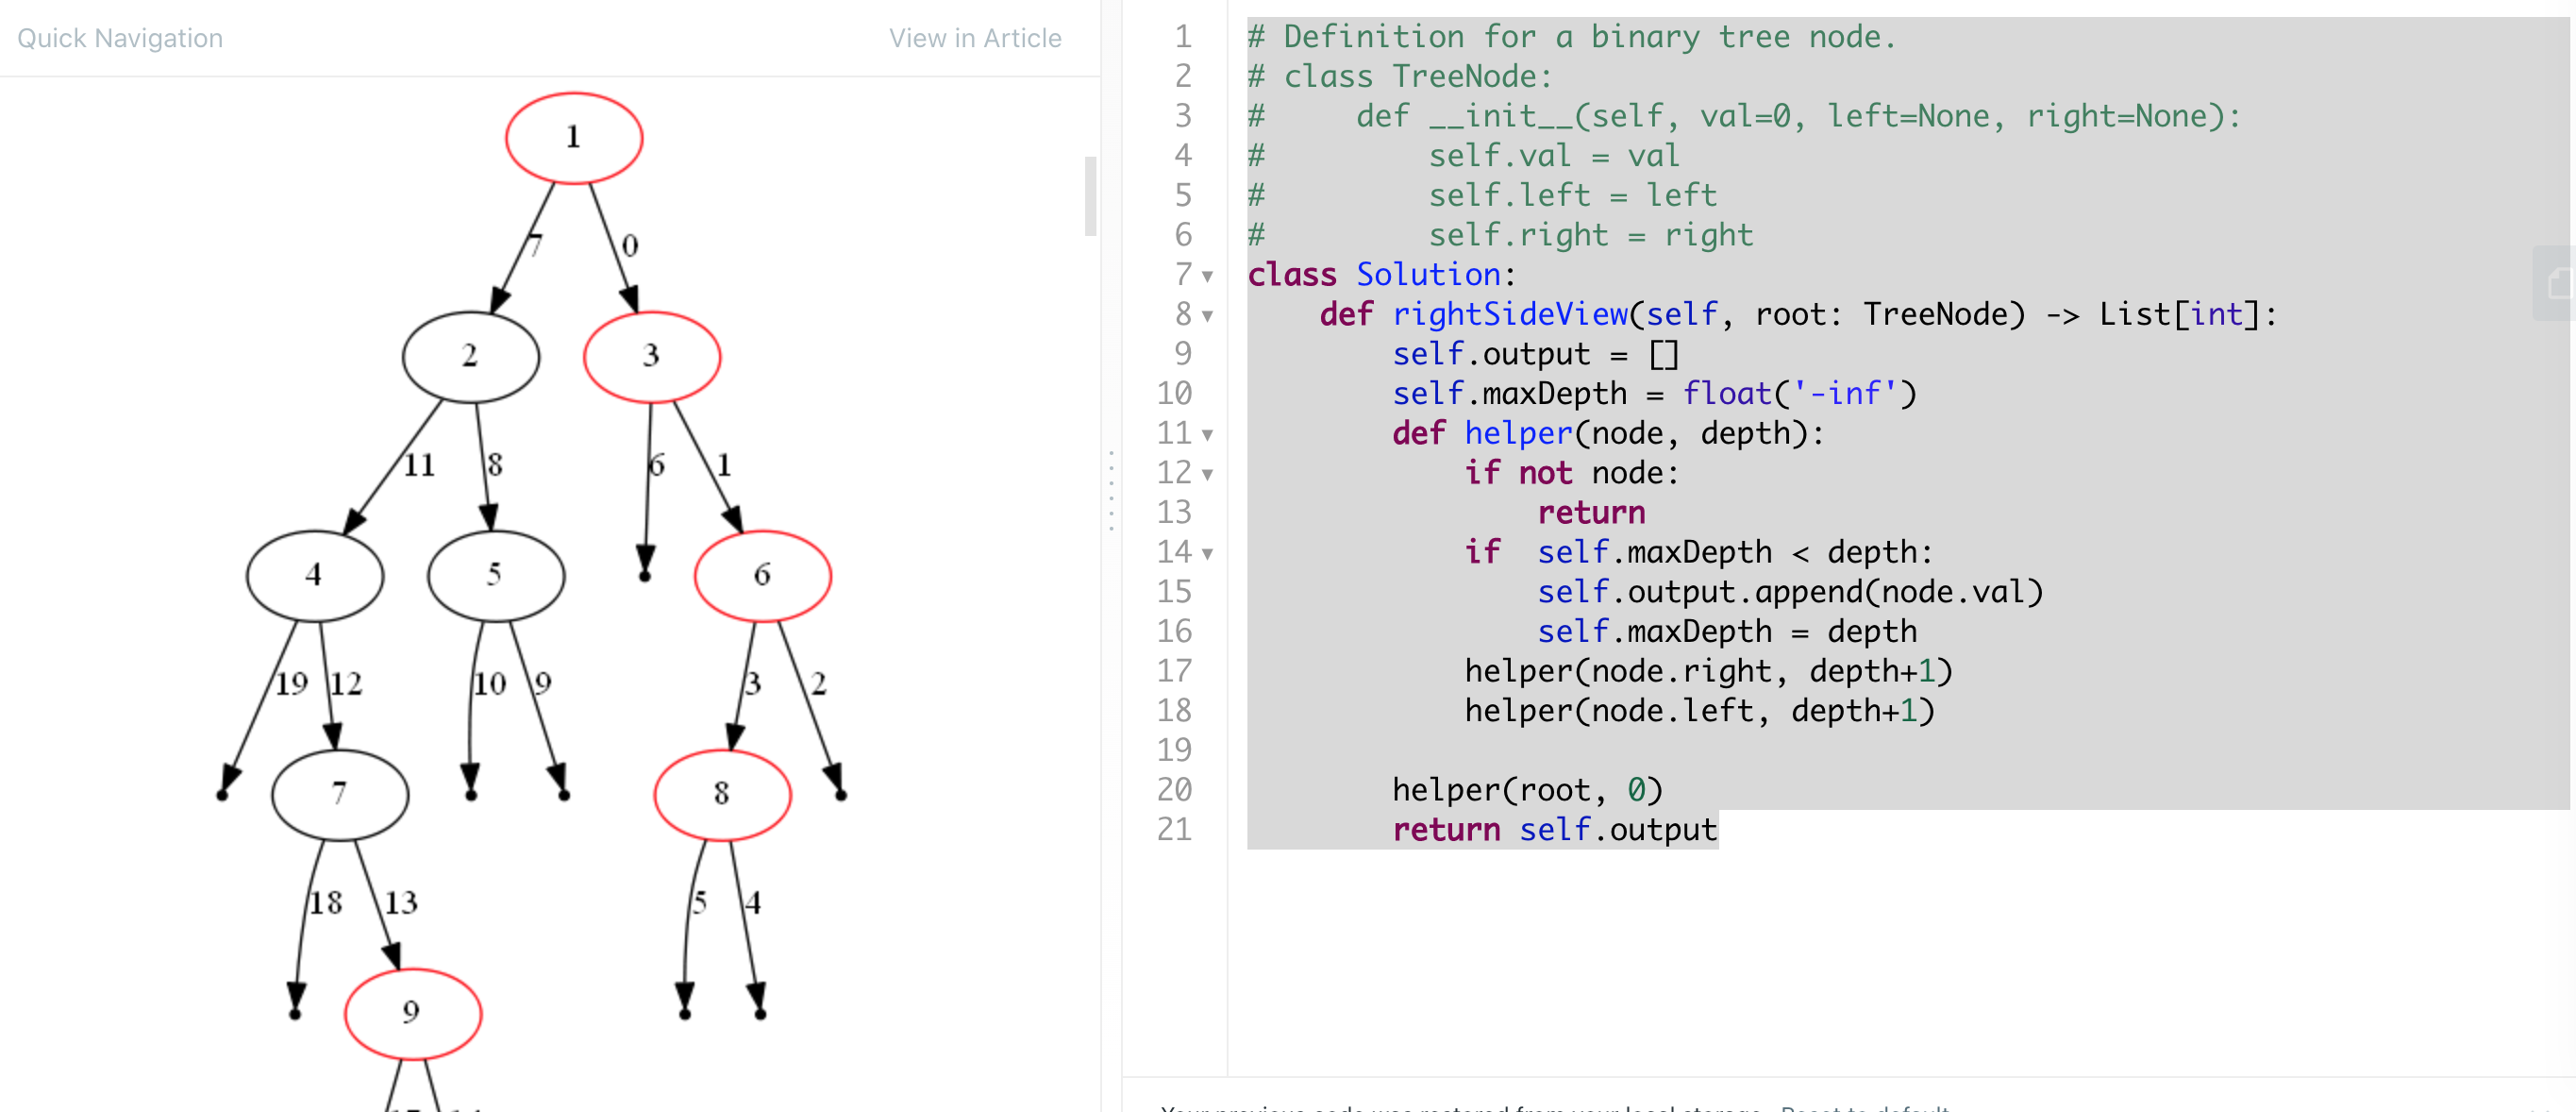

**<font color=red> 这段code怎么从node8 to node 9?</font>**

# LC110. Balanced Binary Tree - 5/22/2020

https://leetcode.com/problems/balanced-binary-tree/

Tag: Tree, DFS, Depth, Height

In [ ]:
# Following code could return the height of the node. 

# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isBalanced(self, root: TreeNode) -> bool:   
        def helper(root):
            if not root: 
                return -1
            root_height = max(helper(root.left), helper(root.right))+1
            return root_height
        # print(helper(root))

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def isBalanced(self, root: TreeNode) -> bool:   
        def helper(root):
            if not root: 
                return True, -1
            
            left_flag, left_height = helper(root.left)
            right_flag, right_height = helper(root.right)
            
            flag = abs(left_height-right_height)<2 and left_flag and right_flag
            height = 1+max(left_height, right_height)
    
            return flag, height
        balance_flag = helper(root)[0]
        return balance_flag
        # print(helper(root))

## Summary

首先先clarify两个概念：

Depth：root的depth=0

Height：leaf的height=0 

这个题是个明显的recursion题目。我个人现在总结的recursion主要是三个部分。

第一个部分not root的情况。一般来说就是leaf的情况，我们来考虑，当我们reach到了leaf的时候，我们需要return什么？是None还是0还是根本就不需要return任何东西。

第二个部分是recursion如何传递下去的。一般都要分两个部分，分别是node.left和node.right。

第三个部分就是recursion如何在内部计算的。通常要根据题目的具体要求以及我们想要的返回值来写。

我个人的想法是，先假设我们已经有了这个递归函数，我们先要想的是我们需要什么结果，然后根据结果出发，写出这个递归函数，最后才是第三部分的具体编写。 

# LC56. Merge Intervals - 5/21/2020

https://leetcode.com/problems/merge-intervals/

Tag: Interval, lambda

In [ ]:
class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:
        output = []
        for i in sorted(intervals,key=lambda x:x[0]):
            if output and i[0] <= output[-1][1]:
                output[-1][1] = max(i[1],output[-1][1])
            else:
                output.append(i)
        return output
        

In [ ]:
# 如何按照key value 排序一个dictionary。貌似没有特别简单的方法

# Option1 

from collections import OrderedDict 
  
dict = {'ravi':'10','rajnish':'9','sanjeev':'15','yash':'2','suraj':'32'} 
dict1 = OrderedDict(sorted(dict.items())) 
print(dict1) 


## Summary

1. sorted()函数
   
   list.sort(cmp=None, key=None, reverse=False)
   
   这里面可以明确排序的key是什么。 

2. lambda()函数：A lambda function can take any number of arguments, but can only have one expression.

    x = lambda a : a + 10
    
    x = lambda a, b : a * b

结构是lambda 变量（可以多个）：变量的表达式

# LC560. Subarray Sum Equals K - 5/21/2020

https://leetcode.com/problems/subarray-sum-equals-k/

Tag: Array

In [ ]:
# 这是我最开始的想法，o(n^2)。两个loop，第一个loop来判断subarray里面有多少个元素。
# 第二个就是遍历整个list找到合适的。现在考虑的就是该如何降低这个running time. 
# 最直接的想法就是要去减少循环的使用。最好只用一个循环。 

class Solution:
    def subarraySum(self, nums: List[int], k: int) -> int:
        output = 0
        for i in range(1, len(nums)+1):
            for j in range(len(nums)-i+1):
                if sum(nums[j:j+i]) == k:
                    output += 1
        return output

In [ ]:
class Solution:
    def subarraySum(self, nums: List[int], k: int) -> int:
        d = {}
        d[0]= 1
        s = 0
        count = 0
        for i in range(len(nums)):
            s += nums[i]
            if s-k in d:
                count += d[s-k]
            
            if s in d:
                d[s] += 1
            else:
                d[s] = 1
        
        return count

## Summary:

**<font color=red>为啥第一个algo的running time=o(n^3)</font>**

还是要借助一下hashtable（其实就是dictionary）。以及数组的累计求和（这个我之前考虑到了）以及现在的累计和和之前累计和的差值（这个我之前也考虑到了）。

这个题目的思路如下：

首先先构建关于累计和的hashtable.

遍历整个数组（这个是不得不做的，也是唯一我们能做的循环），然后求出每个元素对应的累计和。下面就是我们可能会遇到的三种情况：

1. 如果s-k之前在hashtable里面出现过，那就意味着我们在现有累计和的基础上，把s-k累计和的那些元素排除，那么我就能能得到 s-(s-k)=k了。 **<font color=red>那为啥要加上d[s-k]呢</font>** **<font color=blue>我个人的理解是d[s]代表有多少种实现这个s的subarray。</font>**

2. 如果累计和出现过，那么就要在d[s]上多一个，表明我们有一种新的subarray可以实现这个s

3. 如果累计和没有出现过，那么就在hashtable上多一个元素d[s] = 1


# LC31. Next Permutation - 5/21/2020

https://leetcode.com/problems/next-permutation/

Tag: Hard to undertand the problem's logic

In [ ]:
class Solution:
    def nextPermutation(self, nums: List[int]) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        # reverse a subarray btw left index and right index
        def reverseSubArray(arr, left_idx, right_idx):
            while left_idx < right_idx:
                arr[left_idx], arr[right_idx] = arr[right_idx], arr[left_idx]
                left_idx += 1
                right_idx -= 1
        
        # find first descending item
        firstDescItemIdx = len(nums)-1
        while firstDescItemIdx > 0 and nums[firstDescItemIdx]<=nums[firstDescItemIdx-1]:
            firstDescItemIdx -= 1
        
        # if input nums is already in descending order, then reverse all items
        if firstDescItemIdx == 0:
            reverseSubArray(nums, 0, len(nums)-1)
            return 
        
        # find the next item larger than the 1st descending item
        nextItemIdx = len(nums)-1
        while firstDescItemIdx > 0 and nums[nextItemIdx]<=nums[firstDescItemIdx-1]:
            nextItemIdx -= 1
        
        # reverse the order of the 1st descending item and next item larger than the 1st descending item
        nums[firstDescItemIdx-1], nums[nextItemIdx] = nums[nextItemIdx], nums[firstDescItemIdx-1]
        
        # reverse the rest
        reverseSubArray(nums, firstDescItemIdx, len(nums)-1)
        

## Summary:

我一开始完全没搞懂这个题问的是什么？什么叫 “Implement next permutation, which rearranges numbers into the lexicographically next greater permutation of numbers”

1. 如果本身已经是递减的话，那就返回全部的递增

2. 首先去找第一个开始递减的元素

3. 然后去找第一个比这个递减元素大的元素

4. 交换两个元素，然后将从第一个递减元素开始的subarray全部reverse

**<font color=red>完全不知道这个题考查了什么知识？</font>**

# LC139. Word Break - 5/24/2020

https://leetcode.com/problems/word-break/

Tag: String

In [ ]:
# 最初的想法是，把s切片，然后去看左边的string是否在wordDict里面。如果在的话，那就从
# s中把这个sub string删除掉。但问题在于，如果有剩余的话，如何更有效的停止。我现在的
# 停止条件是如果这个剩余的sub string比较短，那么就停止。但问题在于，如果剩余的sub 
# string 和wordDict里面的item一样长，那就有问题了。 

class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        min_word_len = float('inf')
        for _ in wordDict:
            if len(_) <= min_word_len:
                min_word_len = len(_)
        print(min_word_len)     
        while s:
            # print('s: ', s)
            for t in range(1,len(s)+1):
                left_s = s[:t]
                # print(left_s)
                right_s = s[t:]
                if left_s in wordDict:
                    s = right_s
                    break
                    # print('sub s: ',s)
            if len(s) < min_word_len:
                break
        
        if s:
            return False
        else:
            return True


In [ ]:
class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        dp = [False] * (len(s)+1)
        dp[0] = True
        for i in range(len(s)):
            print('i-',i, dp)
            for j in range(i, len(s)+1):
                if dp[i] == True and s[i:j] in wordDict:
                    # print(s[i:j])
                    dp[j] = True
        # print(dp)
        return dp[-1]    

## Summary

对于第二个答案，我无法理解的是对于如下的test case：

Input: s = "catsandog", wordDict = ["cats", "dog", "sand", "and", "cat"]

i- 0 [True, False, False, False, False, False, False, False, False, False]

i- 1 [True, False, False, True, True, False, False, False, False, False]

i- 2 [True, False, False, True, True, False, False, False, False, False]

i- 3 [True, False, False, True, True, False, False, False, False, False]

i- 4 [True, False, False, True, True, False, False, True, False, False]

i- 5 [True, False, False, True, True, False, False, True, False, False]

i- 6 [True, False, False, True, True, False, False, True, False, False]

i- 7 [True, False, False, True, True, False, False, True, False, False]

i- 8 [True, False, False, True, True, False, False, True, False, False]

**<font color=red> 从i=6开始的dog，dp[6]=True而且dp[6:8]也在wordDict里面，为啥dp[8]还是False呢？</font>**

# LC215. Kth Largest Element in an Array - 5/24/2020

https://leetcode.com/problems/kth-largest-element-in-an-array/

Tag: sorted list

In [ ]:
class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        # print(sorted(nums))
        return sorted(nums)[len(nums)-k]

# LC415. Add Strings - 5/24/2020

https://leetcode.com/problems/add-strings/

Tag: string, ord() function

In [17]:
class Solution:
    def addStrings(self, num1: str, num2: str) -> str:
#       convert the strings to stacks
        num1 = list(num1)
        num2 = list(num2)
#       set a counter to memorize which digit
        c = 0 
#       set a variable to store the output
        out = 0
        while num1:
            out += (ord(num1.pop()) - ord('0')) *10**c
            c += 1
        c = 0 
        while num2:
            out += (ord(num2.pop()) - ord('0')) *10**c
            c += 1
        return str(out)

## Summary

个人觉得没有什么太多意思的一个题目。就考查了一个ord() function的使用。

ord(): Given a string of length one, return an integer representing the Unicode code point of the character when the argument is a unicode object

# LC88. Merge Sorted Array - 5/24/2020

https://leetcode.com/problems/merge-sorted-array/

Tag: list, insert(), extend()

In [ ]:
# 这个算上是比较笨的办法了，就是一个一个元素的比较。然后nums2如果有多余的元素的话，再把它们添加到nums1里面。但问题是下面的这段code
# 无法解决 nums1 [0] 0; nums2[1] 1的test case.关键是我不知道m=0代表什么意思？

class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        """
        Do not return anything, modify nums1 in-place instead.
        """
        i = 0 
        j = 0 
        while i < m and j < n:
            if nums1[i] > nums2[j]:
                nums1.insert(i, nums2[j])
                nums1.pop(-1)
                nums2.pop(j)
                j += 1
            i += 1
        j = 0
        while j < len(nums2):
            nums1.insert(i+1, nums2[j])
            nums1.pop(-1)
            j += 1
            i += 1
        return nums1

In [ ]:
# 这个就是大神的做法了。利用了几个我会在后面总结的list的build-in functions

class Solution:
    def merge(self, nums1: List[int], m: int, nums2: List[int], n: int) -> None:
        """
        Do not return anything, modify nums1 in-place instead.
        """
        sub_nums1 = nums1[:m]
        nums1.clear()
        nums1.extend(sub_nums1)
        nums1.extend(nums2)
        nums1.sort()

## Summary

下面是关于list的几个函数的总结:

1. list.append()：将任意格式的元素（可以是一个元素，或者是一个list）加到list后面（作为一个元素）

2. list.extend()：将一个list，合并到list上，input格式只能是list，而且是把两个list合并起来。

3. list.clear()

4. list.sort(): 类似于sorted(list)。都能实现list的排序。不同的是list.sort()是直接在list上进行排序了，没有返回值。

5. list.pop(): list也可以使用pop.其中的pop()的input只能是元素的index

6. list.remove(): 类似于pop(),都能实现把某些个元素移除。但remove()里面的input必须是元素本身。 

# LC380. Insert Delete GetRandom O(1) - 5/24/2020

https://leetcode.com/problems/insert-delete-getrandom-o1/

Tag: data strucure class, list, dictionary

In [18]:
# 这是我自己写的code，虽然能pass 所有的test cases，但是不够快。主要问题在于list在delete/pop intermediate item的时候，running time
# 是o(n).所以为了实现更快的做法，首先需要pop()，即pop最后一个元素。其次，需要利用hashtable。 

class RandomizedSet:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.a = []

    def insert(self, val: int) -> bool:
        """
        Inserts a value to the set. Returns true if the set did not already contain the specified element.
        """
        if val in self.a:
            return False
        else:
            self.a.append(val)
            return True

    def remove(self, val: int) -> bool:
        """
        Removes a value from the set. Returns true if the set contained the specified element.
        """
        if val in self.a:
            self.a.remove(val)
            return True
        else:
            return False

    def getRandom(self) -> int:
        """
        Get a random element from the set.
        """
        return choice(self.a)
        


# Your RandomizedSet object will be instantiated and called as such:
# obj = RandomizedSet()
# param_1 = obj.insert(val)
# param_2 = obj.remove(val)
# param_3 = obj.getRandom()

In [ ]:
class RandomizedSet:

    def __init__(self):
        """
        Initialize your data structure here.
        """
        self.data_list = []
        self.data_dict = {}
        
    def insert(self, val: int) -> bool:
        """
        Inserts a value to the set. Returns true if the set did not already contain the specified element.
        """
        if val in self.data_dict:
            return False
        else:
            self.data_list.append(val)
            self.data_dict[val]=len(self.data_list)-1
            return True

    def remove(self, val: int) -> bool:
        """
        Removes a value from the set. Returns true if the set contained the specified element.
        """
        if val in self.data_dict:
            remove_val_idx = self.data_dict[val]
            last_item_val = self.data_list[-1]
            self.data_dict[last_item_val] = remove_val_idx
            self.data_list[remove_val_idx], self.data_list[-1] = last_item_val, val
            self.data_list.pop()
            self.data_dict.pop(val)
            return True
        else:
            return False

    def getRandom(self) -> int:
        """
        Get a random element from the set.
        """
        return choice(self.data_list)
        


# Your RandomizedSet object will be instantiated and called as such:
# obj = RandomizedSet()
# param_1 = obj.insert(val)
# param_2 = obj.remove(val)
# param_3 = obj.getRandom()

## Summary

python里面的class需要注意的几点：


第一个solution太慢了，需要用第二个solution（利用dictionary）。下面是几个list和dictionary的running time summary：

### list
1. append: o(1)
2. pop (last item): o(1)
3. pop (intermeidate item): o(k)
4. insert: o(n)
5. get/set item: o(1)
6. extend: o(k)
7. min()/max(): o(n)
8. len(): o(1)


### dictionary
1. get/set item: o(1)
2. delete item: o(1)
3. iteration: o(n)


# LC 543. Diameter of Binary Tree - 5/25/2020

https://leetcode.com/problems/diameter-of-binary-tree/

Tag: Tree, Recursion

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def diameterOfBinaryTree(self, root: TreeNode) -> int:
        def helper(root):
            if not root:
                return 0, 0 # return two values; one is the height and another is the diameter
            l_depth, l_diameter = helper(root.left)
            r_depth, r_diameter = helper(root.right)
            
            depth = 1 + max(l_depth, r_depth)
            diamter = max(l_depth+r_depth, l_diameter, r_diameter)
            return depth, diamter
        return helper(root)[1]
                

## Summary

同样用了tree中的recursion，有几个我个人总结的点。 

1. recursion function中尽量不要用除了root以外的input，这样我个人认为会比较简单。 

2. recursion的structure中，可以先写递归关系。这样，比较好写具体的recursion逻辑。 

# LC680. Valid Palindrome II - 5/25/2020

https://leetcode.com/problems/valid-palindrome-ii/

Tag: List

In [ ]:
# TLE: 我个人的理解是，我这个code 的running time是o(n).但按照LC的要求，这个还是不够快？

class Solution:
    def validPalindrome(self, s: str) -> bool:
        delete_count = 0
        left_idx = 0
        right_idx = len(s)-1
        while left_idx < right_idx:
            if delete_count == 0:
                if s[left_idx] == s[right_idx]:
                    left_idx += 1
                    right_idx -= 1
                elif s[left_idx+1] == s[right_idx]:
                    left_idx += 1
                    delete_count += 1
                elif s[left_idx] == s[right_idx-1]:
                    right_idx -= 1
                    delete_count += 1
            else:
                if s[left_idx] != s[right_idx]:
                    return False
                else:
                    left_idx += 1
                    right_idx += 1
        return True
            

In [ ]:
# 通过recursion来解决问题。思路和我iteration的思路完全一样。 

class Solution:
    def validPalindrome(self, s: str) -> bool:
        def helper(s, left_idx, right_idx, delete_count):
            while left_idx < right_idx: 
                if s[left_idx] != s[right_idx]:
                    if delete_count >= 1:
                        return False
                    else:
                        return helper(s,left_idx+1, right_idx, delete_count+1) or helper(s,left_idx, right_idx-1, delete_count+1)
                else:
                    left_idx += 1  
                    right_idx -= 1
            return True
        return helper(s, 0, len(s)-1, 0)

## Summary

1. list.reverse()和reversed(list)，虽然效果一样，都能把一个list翻转过来。但list.reverse()是直接把原list翻转。而reversed(list)是返回一个iteration，每个元素是翻转之后的元素（**<font color=red> 我的理解是iteration只能通过循环访问？</font>**）

2. 需要重新回归我自己写的iteration solution，我个人认为这个running time和recursion应该是一样的。 所以应该是我哪里有问题，导致TLE。 

# LC67. Add Binary - 5/25/2020

https://leetcode.com/problems/add-binary/

Tag: DP

In [ ]:
# 这是我写的code，有点复杂。但是核心思想是DP.至于我为什么想到DP，我的思路是这样的。最右边的两个数字相加，得到我们需要的1，0. 
# 但这里有可能会进位。所以我们得在找个数组记录是否有进位的情况。所以我设计了两个DP matrix来解决这个问题。 

class Solution:
    def addBinary(self, a: str, b: str) -> str:
        x = len(a)
        y = len(b)
        
        n = max(x, y)
        
        if x<y:
            # print('--')
            new_a = ('0'*(y-x) + a)[::-1]
            new_b = b[::-1]
        else:
            # print('**')
            new_b = ('0'*(x-y) + b)[::-1]
            new_a = a[::-1]
        
        # print(new_a)
        # print(new_b)
        
        dp1 = [[0] * (n+1) for i in range(n+1)]
        dp2 = [[False] * (n+1) for i in range(n+1)]
        # print(dp1)
        # print(dp2)
        
        output = []
        # print(n)
        for i in range(n):
            # print('---')
            # print(i)
            # print(dp2[i][i])
            if dp2[i][i] == False:
                if int(new_a[i]) + int(new_b[i]) == 0:
                    dp1[i][i] = 0
                    dp2[i+1][i+1] = False
                if int(new_a[i]) + int(new_b[i]) == 1:
                    dp1[i][i] = 1
                    dp2[i+1][i+1] = False
                if int(new_a[i]) + int(new_b[i]) == 2:
                    dp1[i][i] = 0
                    dp2[i+1][i+1] = True
            else:
                if int(new_a[i]) + int(new_b[i]) == 0:
                    dp1[i][i] = 1
                    dp2[i+1][i+1] = False
                if int(new_a[i]) + int(new_b[i]) == 1:
                    dp1[i][i] = 0
                    dp2[i+1][i+1] = True
                if int(new_a[i]) + int(new_b[i]) == 2:
                    dp1[i][i] = 1
                    dp2[i+1][i+1] = True
            output.append(dp1[i][i])
        
        if dp2[-1][-1]:
            output.append(1)
        
        output_list = output[::-1]
        return ''.join(str(_) for _ in output_list)

## Summary

这里我是想考虑一下DP和recursion的问题。我一开始认为DP和recursion是可以相互转换的。比如一个问题如果能用DP解决，那么他就应该能用recursion解决。因为两个solution的思路都是上一步的output是下一步的input.

**<font color=red>DP是一种更优的recursion吗？或者说不是每个recursion都能利用DP优化的？</font>**

DP的关键在于问题中是否有以下两个点：

1. overlapping subproblems: same pattern must be repeated. merge-sort is a recursion but cannot be solved in DP. th

2. optimal solution: the solution to solve a subproblem is the same for solving the overall problem. 


# LC236. Lowest Common Ancestor of a Binary Tree - 5/26/2020

https://leetcode.com/problems/lowest-common-ancestor-of-a-binary-tree/

Tag: Tree

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        if not root:
            return None
        if root == p or root == q:
            return root
        
        left_node = self.lowestCommonAncestor(root.left, p, q)
        right_node = self.lowestCommonAncestor(root.right, p, q)
        
        # 最完美的情况，就是这个root下面的left和right正好是我们要找的p和q。如果是这种情况的话，那就返回root
        if left_node and right_node:
            return root
        # 如果只有left满足了条件，那么我们往左走一步。因为同时包含p和q的ancstor肯定是在left这边
        if left_node and not right_node:
            return left_node
        # 类似于left的情况
        if right_node and not left_node:
            return right_node
        # 如果left和right都不满足的话，那就没有返回的值了。
        if not left_node and not right_node:
            return None

# LC125. Valid Palindrome - 5/26/2020

https://leetcode.com/problems/valid-palindrome/

Tag:

In [ ]:
class Solution:
    def isPalindrome(self, s: str) -> bool:
        new_s = []
        for _ in s:
            if _.isalnum():
                new_s.append(_.lower())
        left_idx = 0
        right_idx = len(new_s)-1
        while left_idx < right_idx:
            if new_s[left_idx] != new_s[right_idx]:
                return False
            left_idx += 1
            right_idx -= 1
        return True

## Summary

isalnum(): 检测字符串是否由字母和数字组成。

isalpha(): 检测字符串是否只由字母组成

# LC 314. Binary Tree Vertical Order Traversal - 6/1/2020

https://leetcode.com/problems/binary-tree-vertical-order-traversal/

Tag: Tree, Deque

## Binary Search - 7/19/2020

https://www.jiuzhang.com/solutions/binary-search/


二分法 50%和排序数组有关。剩下的要根据时间复杂度来看。 

如果我们要找比o(n)更优的解法，那就只能是o(logn),就是二分法。 

1. 


o(logn） 二分法

o(n^1/2) 分解质因数

o(n) 双指针，单调栈，枚举法

o(n^2) o(n^3) 动态规划

2. 


什么时候用recursion?

2.1 面试要求

2.2 递归深度不太深

2.3 非递归无法解决

2.4 DFS

3. 


什么时候不能用recursion？

3.1 linked list绝对不用recursion。

3.2 o(n)的话，一般10^8基本没有问题（1s完成）- ? 为什么o(n^2)不会 StackOverFlow - 这个时候n最多是10^4，所以在对应深度之内？

3.3 StackOverFlow的话，对应的深度大概是10^5。递归的话，系统独立分配了8M空间（单独的进程）给你做计算的。

3.4 所以二分法是不太用recursion的！！！



In [19]:
# my code: 想用递归去写，但不知道该如何写
# using o(logn) time to find the target number in a sorted array
# test case - 1 
a = [1,2,3,4,5]
target = 4

def dtBinarySearch(a, target):
    l_idx = 0 
    r_idx = len(a)-1 # 最右边的元素总是len(array)-1
    return helper(a, target, l_idx, r_idx)
    
    
def helper(a, target, l_idx, r_idx):
    # exist condition
    mid_idx = (r_idx - l_idx) // 2
    if target == a[mid_idx]:
        return mid_idx
    
    if target < a[mid_idx]:
        r_idx = mid_idx
    else:
        l_idx = mid_idx
    a = a[l_idx, r_idx]
    

In [20]:
# my code-2: 不用递归，用while循环或者说双指针？
a = [1,2,3,4,5]
target = 4

# 非常“巧妙”地进入死循环了。。。
def dtBinarySearch(a, target):
    l_idx = 0
    r_idx = len(a)-1
#     print('go to loop')
    while l_idx < r_idx:
#         print('---')
        mid_idx = (l_idx+r_idx)//2
        if a[mid_idx]==target:
            return mid_idx
        elif a[mid_idx] > target:
            r_idx == mid_idx
        elif a[mid_idx] < target:
            l_idx == mid_idx
            
print(dtBinarySearch(a, target))

KeyboardInterrupt: 

## 457: 经典二分查找问题 - 7/19/2020 

https://www.lintcode.com/problem/classical-binary-search/description

In [14]:
# Input: nums = [1,2,2,4,5,5], target = 2
# Output: 1 or 2 (shall we do "1 or 2" or "1 and 2")

# my code: 应该和上面的一样，都是在一个sorted array 


## 14. 二分查找 - 7/19/2020

https://www.lintcode.com/problem/first-position-of-target/description

In [15]:
# 输入:[1,4,4,5,7,7,8,9,9,10]，1
# 输出: 0

## 458. 目标最后位置 - 7/19/2020

https://www.lintcode.com/problem/last-position-of-target/description

输入：nums = [1,2,2,4,5,5], target = 2
输出：2

## 447. 在大数组中查找 - 7/19/2020

https://www.lintcode.com/problem/search-in-a-big-sorted-array/description

Case-1: 

输入: [1, 3, 6, 9, 21, ...], target = 3
输出: 1

Case-2:

输入: [1, 3, 6, 9, 21, ...], target = 4
输出: -1

## 460. 在排序数组中找最接近的K个数 - 7/19/2020

https://www.lintcode.com/problem/find-k-closest-elements/description


## 585. 山脉序列中的最大值 - 7/19/2020

https://www.lintcode.com/problem/maximum-number-in-mountain-sequence/description

In [16]:
# 输入: nums = [1, 2, 4, 8, 6, 3] 
# 输出: 8


## 159. 寻找旋转排序数组中的最小值 - 7/19/2020

https://www.lintcode.com/problem/find-minimum-in-rotated-sorted-array/


In [17]:
# 输入：[4, 5, 6, 7, 0, 1, 2]
# 输出：0
# 解释：
# 数组中的最小值为0

## 75. 寻找峰值 - 7/19/2020

https://www.lintcode.com/problem/find-peak-element/description

1. 最大的峰是不能用二分法

2. 找所有的峰也是不能用二分法

3. 这个题是找任意的一个峰

In [18]:
# 输入:  [1, 2, 1, 3, 4, 5, 7, 6]
# 输出:  1 or 6

# 解释:
# 返回峰顶元素的下标
# 暴力解法的running time就是o(n)。所以可以考虑更好的解法， 分成ooxx方法。

## 183. 木材加工

https://www.lintcode.com/problem/wood-cut/description

木头的长度就是[1,max(L0)]

我们二分的不是原来给的array，而是可能的答案在被二分

running time: o(nlog(max(L)) 这里面的n是因为我们的判断函数要遍历所有给定的array，但log里面不是n，因为我们二分的不是原来的array，而是答案集的长度（max of L）

# LintCode627. Longest Palindrome - 7/20/2020

https://www.lintcode.com/problem/longest-palindrome/description?_from=ladder&&fromId=161

In [45]:
class Solution:
    """
    @param s: a string which consists of lowercase or uppercase letters
    @return: the length of the longest palindromes that can be built
    """
    # very bad running time. must have a better way to do it
    def longestPalindrome(self, s):
        # write your code here
        # check empty string
        if len(s) == 0:
            return 0
            
        s_dict = {}
        for i in range(len(s)):
            if s[i] in s_dict.keys():
                s_dict[s[i]]+=1
            else:
                s_dict[s[i]]=1
#         print(s_dict)
        
        single_char_flag = 0
        output = 0
        for k in s_dict.keys():
            # 奇数个，但整个string就只有这么多个字符，比如‘aaa’
            if s_dict[k] % 2 !=0 and s_dict[k] == len(s):
                return s_dict[k]
            # 奇数个，所以我们可以拿出一个当做最中间的那项
            if s_dict[k] % 2 !=0:
                single_char_flag = 1
                output += int(s_dict[k]/2)*2
            else:
                # 偶数个，全部用来构建回文串 
                output += s_dict[k]
        
        if single_char_flag == 1:
            output += 1
        
        return output

test_case = 'aaa'
my_solution = Solution()
print(my_solution.longestPalindrome(test_case))

3


## Comments: 

1. string不能直接用sort/reverse，但可以用sorted(s)/s[::-1]



In [54]:
s = 'cba'
print(sorted(s))
print(s[::-1])

['a', 'b', 'c']
abc


# LintCode 13. Implement strStr() - 7/20/2020

https://www.lintcode.com/problem/implement-strstr/description

In [56]:
class Solution:
    """
    @param source: 
    @param target: 
    @return: return the index
    """
    def strStr(self, source, target):
        # Write your code here
        # check empty string
        if len(source) == 0 and len(target) != 0:
            return -1
        if len(target) == 0 and len(source) != 0:
            return 0
        if len(source) == 0 and len(target) == 0:
            return 0
        
        output = 0
        for i in range(len(source)):
            for j in range(len(target)):
                if source[i:i+len(target)] == target:
                    output = i
                    return output
        
        return -1
source = ''
target = ''
my_solution = Solution()
print(my_solution.strStr(source, target))

0


# LintCode 415. Valid Palindrome - 7/20/2020

https://www.lintcode.com/problem/valid-palindrome/description?_from=ladder&&fromId=161


In [58]:
class Solution:
    """
    @param s: A string
    @return: Whether the string is a valid palindrome
    """
    def isPalindrome(self, s):
        # write your code here
        # check if empty string
        if len(s) == 0:
            return True
        
        left = 0
        right = len(s)-1
        
        while left < right:
            if not s[left].isalnum():
                left += 1
            elif not s[right].isalnum():
                right -= 1
                # print('left: ', s[left], '  ', 'right: ', s[right])
            elif s[left].upper() == s[right].upper():
                left += 1
                right -= 1
            else:
                return False
        return True

s = ''
my_solution = Solution()
print(my_solution.isPalindrome(s))

True


# LintCode 200. 最长回文子串 - 7/21/2020

https://www.lintcode.com/problem/longest-palindromic-substring/description?_from=ladder&&fromId=161

In [6]:
# my 1st draft but cannot pass test case 'abb'

class Solution:
    """
    @param s: input string
    @return: a string as the longest palindromic substring
    """
    def longestPalindrome(self, s):
        # write your code here
        if len(s) == 0:
            return -1
            
        if len(s) == 1:
            return s
        
        left = 0
        right = len(s) - 1
        
        left_output = ''
        right_output = ''
        
        while left <= right:
            # 两个字母不相同，那么各挪一位
            if s[left] != s[right]:
                left_output = ''
                right_output = ''
            elif s[left] == s[right] and left != right:
                left_output = left_output + s[left]
                right_output = s[right] + right_output
            elif s[left] == s[right] and left == right:
                left_output = left_output + s[left]
            left += 1
            right -= 1
        
        output = left_output + right_output
        
        if len(output) == 0:
            return -1
        else:
            return output

                
s = 'abb'
my_solution = Solution()
print(my_solution.longestPalindrome(s))

b


In [46]:
class Solution:
    """
    @param s: input string
    @return: a string as the longest palindromic substring
    """
    def longestPalindrome(self, s):
        # write your code here
        if len(s) == 0:
            return -1
        
        max_len = -1
        start = 0
        for i in range(len(s)):
            curr_len = max(self.subPalindromeStrLen(s,i,i), self.subPalindromeStrLen(s,i,i+1))
            if curr_len < max_len:
                continue
            max_len = curr_len
            start = i - (curr_len - 1)//2
        
        return s[start:start+max_len]
        
    def subPalindromeStrLen(self, s, left_idx, right_idx):
        while left_idx >= 0 and right_idx <= len(s) - 1:
            if s[left_idx] == s[right_idx]:
                left_idx -= 1
                right_idx += 1
            else:
                break
        return right_idx - left_idx - 1

s = 'abb'
my_solution = Solution()
print(my_solution.longestPalindrome(s))
# print(my_solution.subPalindromeStrLen(s,1,1))

bb


# Special Topic: QuickSort - 7/22/2020

In [50]:
# version 1

def QuickSort(s, start, end):
    # check empty array
    if len(s) == 0:
        return
    
    pivot = s[(end-start)//2]
    
    left = start 
    right = end
    
    while left <= right:
        # 右边的数比pivot小，那就不用动了
        while left <= right and s[left] < pivot:
            start += 1
        # 左边的数比pivot大，那也就不用动了
        while left <= right and s[right] > pivot:
            end -= 1
        # 出现右边的数比pivot大，左边的数比pivot小
        if left <= right:
            s[left], s[right] = s[right], s[left]
            left += 1
            right -= 1
    
    QuickSort(s, start, pivot)
    QuickSort(s, pivot+1, end)

s = [3,2,1,4,5]
start = 0
end = len(s)-1
QuickSort(s,start,end)
pritn(s)


KeyboardInterrupt: 

In [61]:
# version 2

def QuickSort(s, start, end):
    # check empty array
    if len(s) == 0:
        return
    
    if start < end:
        p = Partition(s, start, end)
        QuickSort(s, start, p-1)
        QuickSort(s, p+1, end)

def Partition(s, start, end):
    pivot = s[end]
    i = start
    for j in range(start, end+1):
        if s[j] < pivot:
            s[i], s[j] = s[j], s[i]
            i += 1
    s[i], s[end] = s[end], s[i]
    return i

s = [3,2,1]
start = 0
end = len(s)-1
QuickSort(s,start,end)
print(s)

[1, 2, 3]


# Special Topic: Queue - 7/22/2020

In [72]:
class MyQueue(object):

    def __init__(self):
        # do some intialize if necessary
        self.SIZE = 3
        self.queue = [0] * self.SIZE
        self.head, self.tail = 0, 0

    # @param {int} item an integer
    # @return nothing
    # 压入队列
    def enqueue(self, item):
        queue = self.queue 

        # 队列满 
        if (self.tail + 1) % self.SIZE == self.head:
            return 

        queue[self.tail] = item 
        self.tail = (self.tail + 1) % self.SIZE


    # @return an integer
    # 弹出元素
    def dequeue(self):
        queue = self.queue 

        ## 队列为空
        if self.head == self.tail:
            return -1 

        item = queue[self.head]
        self.head = (self.head + 1) % self.SIZE
        return item 

t = MyQueue()
t.enqueue(1)
t.enqueue(2)
t.enqueue(3)
t.enqueue(4)

print('---')
for i in range(4):
    print(t.dequeue())

---
1
2
-1
-1


# LintCode 69. 二叉树的层次遍历 - 7/25/2020

https://www.lintcode.com/problem/binary-tree-level-order-traversal/description

In [73]:
"""
Definition of TreeNode:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left, self.right = None, None
"""

class Solution:
    """
    @param root: A Tree
    @return: Level order a list of lists of integer
    """
    # 单列队的做法
    def levelOrder(self, root):
        # write your code here
        if not root:
            return []
            
        queue = collections.deque([root]) # 双向的queue
        output = []
        
        while queue:
            output.append([node.val for node in queue])
            for _ in range(len(queue)):
                node = queue.popleft()
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
        
        return output


## Comment: 

1. deque是双向queue

2. 每次循环里面，queue执行的操作是

    1).先把queue里面已有的元素传给output里面
    
    2). 遍历整个queue，先从左pop出这个元素，然后把这个元素的左儿子和右儿子传进queue中

# Special Topic : 二分法 - 7/25/2020

In [74]:
# 二分法的一个不会死循环的模板

class Solution:
    # @param nums: The integer array
    # @param target: Target number to find
    # @return the first position of target in nums, position start from 0 
    def binarySearch(self, nums, target):
        if not nums:
            return -1

        start, end = 0, len(nums) - 1
        # 用 start + 1 < end 而不是 start < end 的目的是为了避免死循环
        # 在 first position of target 的情况下不会出现死循环
        # 但是在 last position of target 的情况下会出现死循环
        # 样例：nums=[1，1] target = 1
        # 为了统一模板，我们就都采用 start + 1 < end，就保证不会出现死循环
        while start + 1 < end:
            # python 没有 overflow 的问题，直接 // 2 就可以了
            # java和C++ 最好写成 mid = start + (end - start) / 2
            # 防止在 start = 2^31 - 1, end = 2^31 - 1 的情况下出现加法 overflow
            mid = (start + end) // 2

            # > , =, < 的逻辑先分开写，然后在看看 = 的情况是否能合并到其他分支里
            if nums[mid] < target:
                start = mid
            elif nums[mid] == target:
                end = mid
            else: 
                end = mid

        # 因为上面的循环退出条件是 start + 1 < end
        # 因此这里循环结束的时候，start 和 end 的关系是相邻关系（1和2，3和4这种）
        # 因此需要再单独判断 start 和 end 这两个数谁是我们要的答案
        # 如果是找 first position of target 就先看 start，否则就先看 end
        if nums[start] == target:
            return start
        if nums[end] == target:
            return end

        return -1

## Comments:

1. 如果你之前写过二分的题目，你会发现在二分问题中，最常见的错误就是死循环。而这个模版一定不会出现死循环。为什么呢？
因为我们这边使用了start + 1 < end, 而不是start < end 或者 start <= end
二分法的模板中，整个程序架构分为两个部分：
通过 while 循环，将区间范围从 n 缩小到 2 （只有 start 和 end 两个点）。
在 start 和 end 中判断是否有解。
而普通的start < end 或者 start <= end 在寻找目标最后一次出现的位置的时候，可能出现死循环。

2. 有同学可能会问为什么明明可以 start = mid + 1 偏偏要写成 start = mid?
大部分时候，mid 是可以 +1 和 -1 的。在一些特殊情况下，比如寻找目标的最后一次出现的位置时，当 target 与 nums[mid] 相等的时候，是不能够使用 mid + 1 或者 mid - 1 的。因为会导致漏掉解。那么为了节省脑力，统一写成 start = mid / end = mid 并不会造成任何解的丢失，并且也不会损失效率——log(n) 和 log(n+1) 没有区别。

# LintCode 607. 两数之和 III-数据结构设计 - 7/26/2020

https://www.lintcode.com/problem/two-sum-iii-data-structure-design/description?_from=ladder&&fromId=161

In [83]:
# version1：这个版本的一个最大的问题，就是一个数字可能会用两次，因为我们在循环的时候，没有考虑left和right会越界的事。
# 但又有一个问题，就是running time很差，只beat 11%的人。所以还需要再改。 

class TwoSum:
    """
    @param number: An integer
    @return: nothing
    """
    def __init__(self):
        self.storage_list = []
        
    def output_list(self):
        print(self.storage_list)
        
    def add(self, number):
        # write your code here
        self.storage_list.append(number)

    """
    @param value: An integer
    @return: Find if there exists any pair of numbers which sum is equal to the value.
    """
    def find(self, value):
        # write your code here
        # empty list check
        if len(self.storage_list) == 0:
            return -1
        self.storage_list.sort()
        
        left = 0 
        right = len(self.storage_list) - 1
        
        while left < right:
            if self.storage_list[left] + self.storage_list[right] > value:
                right -= 1
            if self.storage_list[left] + self.storage_list[right] < value:
                left += 1
            if self.storage_list[left] + self.storage_list[right] == value:
                return True
        return False

test_case = TwoSum()
test_case.add(2)
test_case.add(3)
test_case.output_list()
# 这里面 4 不应该返回True，因为2只有一个，所以我们不能把这个2用两次。 
print(test_case.find(4))

test_case.add(4)
print(test_case.find(7))

[2, 3]
True
True


In [82]:
# version2: 这个版本和之前的版本在于我们每次都要去判断下标是否会越界。如果越界的话，那么我们就不会++ or --，这样就会返回False.

class TwoSum:
    """
    @param number: An integer
    @return: nothing
    """
    def __init__(self):
        self.storage_list = []
        
    def add(self, number):
        # write your code here
        self.storage_list.append(number)

    """
    @param value: An integer
    @return: Find if there exists any pair of numbers which sum is equal to the value.
    """
    def find(self, value):
        # write your code here
        # empty list check
        if len(self.storage_list) == 0:
            return -1
        self.storage_list.sort()
        
        left = 0 
        right = len(self.storage_list) - 1
        
        while left < right:
            while left < right and self.storage_list[left] + self.storage_list[right] > value:
                right -= 1
            while left < right and self.storage_list[left] + self.storage_list[right] < value:
                left += 1
            while left < right and self.storage_list[left] + self.storage_list[right] == value:
                return True
        return False

test_case = TwoSum()
test_case.add(2)
test_case.add(3)
# test_case.output_list()
# 这里面 4 不应该返回True，因为2只有一个，所以我们不能把这个2用两次。 
print(test_case.find(4))

test_case.add(4)
print(test_case.find(7))

False
True


# LintCode 587. 两数之和 - 不同组成 - 7/26/2020

https://www.lintcode.com/problem/two-sum-unique-pairs/description?_from=ladder&&fromId=161


In [86]:
a = set()
a.add((1,1))
print(a)
a.add((1,1))
print(a)

{(1, 1)}
{(1, 1)}


In [88]:
class Solution:
    """
    @param nums: an array of integer
    @param target: An integer
    @return: An integer
    """
    def twoSum6(self, nums, target):
        # write your code here
        if len(nums) == 0:
            return 0
        
        left = 0
        right = len(nums) - 1 
        
        nums.sort()
        
        output = set()
        
        while left < right:
            if left < right and nums[left] + nums[right] < target:
                left += 1
            if left < right and nums[left] + nums[right] > target:
                right -= 1
            if nums[left] + nums[right] == target:
                output.add((nums[left], nums[right]))
                left += 1 
                right -= 1
        
        return len(output)

test = Solution()

## Comments:

1. 这个题的思路还是一样的。其中用了一个hashtable，set(). 这里面有个问题，我现在才搞清楚。python里面有两个hashtable，一个是dictionary{}，一个是set()。 dictionary是key-value，set是key only。但他们都是hash。hash在这个题中的用处就是为了排除重复。

2. twoSum这类或者说双指针的问题，都需要做sort。

# LintCode 148. 颜色分类 - 7/26/2020

https://www.lintcode.com/problem/sort-colors/description?_from=ladder&&fromId=161


In [89]:
class Solution:
    """
    @param nums: A list of integer which is 0, 1 or 2 
    @return: nothing
    """
    def sortColors(self, nums):
        # write your code here
        
        # check empty
        if len(nums) == 0:
            return -1
        
        left = 0 
        right = len(nums) - 1
        i = left
        
        while i <= right:
            if nums[i] == 0:
                nums[left], nums[i] = nums[i], nums[left]
                i += 1
                left += 1
            elif nums[i] == 2:
                nums[right], nums[i] = nums[i], nums[right]
                right -= 1
            else:
                i += 1
                
        return nums

test = Solution()
a = [2,0,2,2,1,2,2,1,2,0,0,0,1]
test.sortColors(a)
print(a)

[0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2]


## Comments:

1. 这个题涉及到三个分类，我们需要找出这三个分类的边界。类似于two point的问题，我们使用了两个pointer.而这个题里面，我们有三个分类，那有可能在“暗示”我们呢需要三个指针。

# LintCode 31. 数组划分 - 7/26/2020

https://www.lintcode.com/problem/partition-array/description?_from=ladder&&fromId=161


In [90]:
class Solution:
    """
    @param nums: The integer array you should partition
    @param k: An integer
    @return: The index after partition
    """
    def partitionArray(self, nums, k):
        # write your code here
        if len(nums) == 0:
            return 0
            
        left = 0
        right = len(nums) - 1
        
        while left <= right:
            while left <= right and nums[left] < k:
                left += 1
            while left <= right and nums[right] >= k:
                right -= 1
            
            if left <= right:
                nums[left], nums[right] = nums[right], nums[left]
                left += 1
                right -= 1
        return left
        # print('---')
        # print(nums)
        # print('left: ', left)
        # print('right: ', right)
        
        # if nums[left] >= k:
        #     return left
        # if nums[right] >= k:
        #     return right
        
        # return 0


# LintCode 57. 三数之和 - 7/26/2020

https://www.lintcode.com/problem/3sum/description?_from=ladder&&fromId=161

In [92]:
a = set()
a.add(1)
b = list(a)
print(type(b))

<class 'list'>


In [93]:
class Solution:
    """
    @param numbers: Give an array numbers of n integer
    @return: Find all unique triplets in the array which gives the sum of zero.
    """
    def threeSum(self, numbers):
        # write your code here
        if len(numbers) == 0:
            return []
        
        numbers.sort()
        pairs = []
        
        for i in range(len(numbers)):
            target = -numbers[i]
            right = len(numbers) - 1
            if numbers[i] == numbers[i-1] and i > 0:
                continue
            self.twoSum(numbers, i+1, right, target, pairs)
            
        return pairs
        
    def twoSum(self, numbers, left, right, target, pairs):
        last_pair = None
        while left < right:
            if numbers[left] + numbers[right] == target:
                if [-target, numbers[left], numbers[right]] != last_pair:
                    pairs.append([-target, numbers[left], numbers[right]])
                last_pair = [-target, numbers[left], numbers[right]]
                left += 1
                right -= 1
            if numbers[left] + numbers[right] > target:
                right -= 1
            if numbers[left] + numbers[right] < target:
                left += 1
            

## Comments：

1. threeSum是建立在twoSum之上的。不同的地方有两个，第一是要判断pair是否有重复。本来我们可以通过set来直接剔除重复项。但我的理解是，因为我们要求的return是list，所以为了输出方便。我们通过判断pair list中的最后一项是否重复来检查重复。 第二是numbers中的重复元素。如果有重复元素的话，那我们就跳到下一个元素，不用去做twoSum的函数了。 


# LintCode 457. 经典二分查找问题 - 7/26/2020

https://www.lintcode.com/problem/classical-binary-search/description?_from=ladder&&fromId=161

In [96]:
class Solution:
    """
    @param nums: An integer array sorted in ascending order
    @param target: An integer
    @return: An integer
    """
    def findPosition(self, nums, target):
        # write your code here
        if len(nums) == 0:
            return -1
        
        left, right = 0, len(nums) -1
        
        while left + 1 < right:
            mid = (left + right) // 2
            if nums[mid] < target:
                left = mid
            elif nums[mid] == target:
                 right = mid
            else:
                right = mid
            
        # print('---')
        # print(nums[left])
        # print(nums[right])
        if nums[left] == target:
            return left
        if nums[right] == target:
            return right
        
        return -1
test= Solution()
nums = [1,2]
pos = test.findPosition(nums, 2)
print(pos寻找右边最小的元素 - 双指针 （我的版本）)

1


# LintCode 460. 在排序数组中找最接近的K个数 - 7/27/2020

https://www.lintcode.com/problem/find-k-closest-elements/description?_from=ladder&&fromId=161

In [144]:
class Solution:
    """
    @param A: an integer array
    @param target: An integer
    @param k: An integer
    @return: an integer array
    """
    def kClosestNumbers(self, A, target, k):
        # write your code here
        if len(A) == 0:
            return 
        
        right = self.findSmallestUpperIdx(A, target) # 这里的return有可能是0吧？
#         right = self.findUpperClosest(A, target)
        left = right - 1
        
        output = []
        
        for _ in range(k):
            if self.compareDiff(A, target, k, left, right):
                output.append(A[left])
                left -= 1
            else:
                output.append(A[right])
                right += 1
        return output
    
    def compareDiff(self, A, target, k,left, right):
        if left < 0:
            return False
        if right > len(A)-1:
            return True
        
        print('---')
        print('left: ', left)
        print('right: ', right)
        
        if target - A[left] <= A[right] - target:
            return True
        else:
            return False
    
        
    # 寻找右边最小的元素 - 双指针 （我的版本）
    def findSmallestUpperIdx(self, A, target):
        left = 0 
        right = len(A) - 1
        while left < right:
            if target > A[right]:
                return right + 1
            if target < A[left]:
                return left
            while left < right and A[left] < target:
                left += 1
            while left < right and  A[right] > target:
                right -= 1 
        return right  
    
    # 寻找右边最小的元素 - 双指针 （答案的版本）
    def findUpperClosest(self, A, target):
        # find the first number >= target in A
        start, end = 0, len(A) - 1
        while start + 1 < end:
            mid = (start + end) // 2
            if A[mid] >= target:
                end = mid
            else:
                start = mid
        
        if A[start] >= target:
            return start
        
        if A[end] >= target:            
            return end
        return len(A)

test = Solution()
A = [1,4,6,10,20]
target = 21
k = 4
# print(test.findSmallestUpperIdx(A, target))
# print('---')
# print(test.findUpperClosest(A, target))

print(test.kClosestNumbers(A, target, k))

[20, 10, 6, 4]


## Comments:
1. 根据答案的分析，我觉得有两个注意点。我们做这个题，有两步。第一步是找到target或者target左右，这时候可以用二分法或者双指针。第二部是这个k的处理，以我目前浅薄的理解。关于k个的问题，基本都是需要使用双指针。而这个题不一样的地方是用了背向双指针。而非我们常用的同向双指针。

# LintCode 159. 寻找旋转排序数组中的最小值 - 7/27/2020

https://www.lintcode.com/problem/find-minimum-in-rotated-sorted-array/description?_from=ladder&&fromId=161


In [145]:
class Solution:
    """
    @param nums: a rotated sorted array
    @return: the minimum number in the array
    """
    def findMin(self, nums):
        # write your code here
        if len(nums) == 0:
            return 
        
        left = 0
        right = len(nums) - 1
        
        while left + 1 < right:
            # 这个题里面是没有 = 的情况，因为题目说了没有重复元素，而且是排序的，所以中间的元素是不会和两边的元素相同
            #（除非这个数组就一个或者两个元素）
            mid = (left + right) // 2
            # 
            if nums[mid] < nums[right]:
                right = mid
            if nums[mid] > nums[right]:
                left = mid
        
        # print('left: ', left)
        # print('right: ', right)
        if nums[left] >= nums[right]:
            return nums[right]
        else:
            return nums[left]


# LintCode 75. 寻找峰值 - 7/27/2020


https://www.lintcode.com/problem/find-peak-element/description?_from=ladder&&fromId=161

In [149]:
class Solution:
    """
    @param A: An integers array.
    @return: return any of peek positions.
    """
    def findPeak(self, A):
        # write your code here
        if len(A) < 3 or A[0] >= A[1] or A[len(A)-2] <= A[len(A)-1]:
            return
        
        left = 1
        right = len(A) - 2
        
        while left + 1 < right:
            mid = (left + right) // 2
            if A[mid] > A[mid-1] and A[mid] > A[mid+1]:
                return mid
            elif A[mid] > A[mid-1] and A[mid] < A[mid+1]:
                right = mid
            elif A[mid] < A[mid-1] and A[mid] > A[mid+1]:
                left = mid
            else:
                right = mid
            
#         print('---')
#         print('left: ', left)
#         print('right: ', right)
        if A[left] > A[right]:
            return left
        else:
            return right

test = Solution()
A = [1,2,1,3,4,5,7,6]

print(test.findPeak(A))

1


# LintCode 183. 木材加工 - 7/27/2020

https://www.lintcode.com/problem/wood-cut/description?_from=ladder&&fromId=161

In [162]:
class Solution:
    """
    @param L: Given n pieces of wood with length L[i]
    @param k: An integer
    @return: The maximum length of the small pieces
    """
    def woodCut(self, L, k):
        # write your code here
        if len(L) == 0:
            return 0
            
        left = 1 
        right = max(L)
        
        while left + 1 < right:
            mid = (left + right) // 2
            if self.calPiece(L, mid) >= k:
                left = mid
            else:
                right = mid
        
        if self.calPiece(L, left) >= k:
            return left
        if self.calPiece(L, right) >= k:
            return right
        
        return 0
        
        
    def calPiece(self, L, each_log_lenth):
        count = 0
        for l in L:
            count += l // each_log_lenth
        return count

# LintCode 433: 433. 岛屿的个数 - 7/31/2020

https://www.lintcode.com/problem/number-of-islands/description

In [163]:
from collections import deque

DIRECTIONS = [(1, 0), (0, -1), (-1, 0), (0, 1)]

class Solution:
    """
    @param grid: a boolean 2D matrix
    @return: an integer
    """
    def numIslands(self, grid):
        # write your code here
        if len(grid) == 0 or len(grid[0]) == 0:
            return 0
        
        visited_node = set()
        output = 0
        
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 1 and (i,j) not in visited_node:
                    self.visit_neighbors(grid, i, j, visited_node)
                    output += 1
        
        return output
        
    def visit_neighbors(self, grid, x, y, visited_node):
        # 这个是我们现有的queue，我们要在这个queue上分析它周围的情况
        queue = deque([(x,y)])
        # 第一步就是先把这个node加到我们visited的hashset里面
        visited_node.add((x,y))
        # 然后就是“经典”的BFS过程
        while queue:
            curr_x, curr_y = queue.popleft()
            for d_x, d_y in DIRECTIONS:
                next_x = curr_x + d_x
                next_y = curr_y + d_y
                # 如果下一个node不是我们需要的，那么就跳过这个node
                if not self.valid_un_visited_node(grid, next_x, next_y, visited_node):
                    continue
                queue.append((next_x, next_y))
                visited_node.add((next_x, next_y))
                
                
    def valid_un_visited_node(self, grid, x, y, visited_node):
        # 如果x和y都越界的话，肯定是False
        if not 0<=x<len(grid) or not 0<=y<len(grid[0]):
            return False
        # 如果这个node我们已经visit过了，那就也是False
        if (x,y) in visited_node:
            return False
        # 返回这个valid and not visited node的value
        return grid[x][y]
            

# LintCode 611. 骑士的最短路线 - 7/31/2020

https://www.lintcode.com/problem/knight-shortest-path/description?_from=ladder&&fromId=161

In [164]:
"""
Definition for a point.
class Point:
    def __init__(self, a=0, b=0):
        self.x = a
        self.y = b
"""

from collections import deque

DIRECTIONS = [
    (-2, -1), (-2, 1), (-1, 2), (1, 2),
    (2, 1), (2, -1), (1, -2), (-1, -2),
]

class Solution:
    """
    @param grid: a chessboard included 0 (false) and 1 (true)
    @param source: a point
    @param destination: a point
    @return: the shortest path 
    """
    def shortestPath(self, grid, source, destination):
        # write your code here
        if len(grid) == 0 or len(grid[0]) == 0:
            return -1
        
        queue = deque([(source.x, source.y)])
        distance = {(source.x, source.y):0}
        
        while queue:
            curr_a, curr_b = queue.popleft()
            if (curr_a, curr_b) == (destination.x, destination.y):
                return distance[(curr_a, curr_b)]
            for d_a, d_b in DIRECTIONS:
                new_a = curr_a + d_a
                new_b = curr_b + d_b
                if self.valid_un_visited_node(new_a, new_b, grid, distance) == 1:
                    continue
                queue.append((new_a, new_b))
                distance[(new_a, new_b)] = distance[(curr_a, curr_b)]+1
        return -1
                
                
                
    def valid_un_visited_node(self, x, y, grid, distance):
        if not 0<=x<len(grid) or not 0<=y<len(grid[0]):
            return 1
        if (x, y) in distance.keys():
            return 1
        return grid[x][y]


# LintCode 137. 克隆图 - 7/31/2020

https://www.lintcode.com/problem/clone-graph/description


In [169]:
"""
class UndirectedGraphNode:
     def __init__(self, x):
         self.label = x
         self.neighbors = []
"""

from collections import deque

class Solution:
    """
    @param node: A undirected graph node
    @return: A undirected graph node
    """
    def cloneGraph(self, node):
        # write your code here
        if not node:
            return None
            
        # 遍历整个tree，用visited 这个hashset记录下所有的nodes.但首先我们要把第一个node记录下来，因为它将是我们整个tree的入口。
        root = node
        queue = deque([node])
        visited = set()
        
        while queue:
            curr_node = queue.popleft()
            visited.add(curr_node)
            for n in curr_node.neighbors:
                if n in visited:
                    continue
                visited.add(n)
                queue.append(n)
        
        # 下面我们需要用一个hashmap建立老tree和新tree的mapping。这样两个tree就是相互独立的。 
        d = {}
        for v in visited:
            d[v] = UndirectedGraphNode(v.label)
        
        # 下面我们需要把心得neighbor传递给新tree
        for v in visited:
            new_node = d[v]
            for n in v.neighbors:
                # print('n: ', n.label)
                # print('d[n]: ', d[n].label)
                new_neighbor = d[n]
                new_node.neighbors.append(new_neighbor)
        
        return d[root]
        
# test_case = {-3,-1,3,5#-1,2,3,3#2,3#3,5#5}  这个test case 没有过，还不知道为什么。 

# LintCode 127. 拓扑排序 - 8/1/2020

https://www.lintcode.com/problem/topological-sorting/description?_from=ladder&&fromId=161


In [170]:
"""
Definition for a Directed graph node
class DirectedGraphNode:
    def __init__(self, x):
        self.label = x
        self.neighbors = []
"""
from collections import deque

class Solution:
    """
    @param: graph: A list of Directed graph node
    @return: Any topological order for the given graph.
    """
    def topSort(self, graph):
        # write your code here
        if not graph:
            return None
        
        # 起始点就是node_indegree_dict中indegree为0的那些node
        start_nodes = []
        d = self.node_indegree(graph)
        for n in d:
            if d[n] == 0:
                start_nodes.append(n)
        output = []
        # output.extend(start_nodes)
        
        queue = deque(start_nodes)
        
        while queue:
            curr_node = queue.popleft()
            output.append(curr_node)
            for n in curr_node.neighbors:
                d[n] -= 1
                if d[n] == 0:
                    queue.append(n)
        
        return output
    
    def node_indegree(self, graph):
        node_indegree_dict = {node:0 for node in graph}
        
        for node in graph:
            for n in node.neighbors:
                node_indegree_dict[n] += 1
        
        return node_indegree_dict

# LintCode 120. 单词接龙 - 8/1/2020

https://www.lintcode.com/problem/word-ladder/description?_from=ladder&&fromId=161

In [171]:
class Solution:
    """
    @param: start: a string
    @param: end: a string
    @param: dict: a set of string
    @return: An integer
    """
    def ladderLength(self, start, end, dict):
        dict.add(end)
        queue = collections.deque([start])
        visited = set([start])
        
        distance = 0
        while queue:
            distance += 1
            for i in range(len(queue)):
                word = queue.popleft()
                if word == end:
                    return distance
                
                print('---')
                print(self.get_next_words(word))
                for next_word in self.get_next_words(word):
                    if next_word not in dict or next_word in visited:
                        continue
                    queue.append(next_word)
                    visited.add(next_word) 

        return 0
        
    # O(26 * L^2)
    # L is the length of word
    def get_next_words(self, word):
        words = []
        for i in range(len(word)):
            left, right = word[:i], word[i + 1:]
            for char in 'abcdefghijklmnopqrstuvwxyz':
                if word[i] == char:
                    continue
                words.append(left + char + right)
        return words

# Special Topic: 堆的基本原理 - 8/2/2020

这一章我们来学习“堆”的相关知识。堆(Heap)是一种重要的数据结构，是实现优先队列(Priority Queues)首选的数据结构。堆有很多种变体，包括二项式堆、斐波那契堆等，但是这里只考虑最常见的二叉堆。

本章关键字：Heap（堆），Priority Queues（优先队列）。

堆是一棵满足如下性质的二叉树：

1、父节点的键值总是不大于它的孩子节点的键值（小顶堆）。

2、父节点的键值总是不小于它的孩子节点的键值（大顶堆）。

由于堆是一棵形态规则的二叉树，因此堆的父节点和孩子节点存在如下关系（根节点编号为0）：

设父节点的编号为 i, 则其左孩子节点的编号为2i+1, 右孩子节点的编号为2i+2

设孩子节点的编号为i, 则其父节点的编号为(i-1)/2

由于上面的性质，父节点一定比他的儿节点小（大），所以整个树的树根的值一定是最小（最大）的，那么我们就能在O(1)的时间内，获得整个堆的极值。

现在有没有发现堆和我们曾经遇到过的优先队列具有很相似的特点，那么二者究竟有何联系呢？

优先队列是一种抽象的数据类型，它和堆的关系类似于，List和数组、链表的关系一样；我们常常使用堆来实现优先队列，因此很多时候堆和优先队列都很相似，它们只是概念上的区分。

优先队列的应用场景十分的广泛，常见的应用有：


Dijkstra’s algorithm（单源最短路问题中需要在邻接表中找到某一点的最短邻接边，这可以将复杂度降低。）

Huffman coding（贪心算法的一个典型例子，采用优先队列构建最优的前缀编码树(prefixEncodeTree)）

Prim’s algorithm for minimum spanning tree

在java，python中都已经有封装了的Priority Queue(Heaps)

优先队列是一个至少能够提供插入（Insert）和删除最小（DeleteMin）这两种操作的数据结构。对应于队列的操作，Insert相当于Enqueue，
DeleteMin相当于Dequeue。

用堆实现优先的过程中，需要注意最大堆只能对应最大优先队列，最小堆则是对应最小优先队列。

# LintCode 900. 二叉搜索树中最接近的值 - 8/3/2020

https://www.lintcode.com/problem/closest-binary-search-tree-value/description?_from=ladder&&fromId=161

In [172]:
"""
Definition of TreeNode:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left, self.right = None, None
"""

import sys

class Solution:
    """
    @param root: the given BST
    @param target: the given target
    @return: the value in the BST that is closest to the target
    """
    def closestValue(self, root, target):
        # write your code here
        # 使用非递归的方法来解决这个问题
        if not root:
            return None
        
        upper = root
        lower = root
        
        while root:
            # 节点比target大，那么我们把它称为target的上界
            if root.val > target:
                upper = root
                root = root.left
            # 节点比target小，那么我们把它称为target的下界
            elif root.val < target:
                lower = root
                root = root.right
            # 很巧的是taget正好就是一个节点，那么我们就返回这个节点
            else:
                return root.val
            
        # 我们开始比较是上界和下界离target近
        if abs(upper.val-target) > abs(lower.val-target):
            return lower.val
        else:
            return upper.val


## Comments:

1. 首先要注意题目是二叉树还是BST。

2. 其次这个题我暂时用的是非递归的方法，但我非常想用递归的方法做一下。 

# LintCode 596. 最小子树 - 8/3/2020

https://www.lintcode.com/problem/minimum-subtree/description?_from=ladder&&fromId=161

In [173]:
# 这是我写的不使用全局变量的recursion，但有些test case无法通过。。。
# {1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16}

"""
Definition of TreeNode:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left, self.right = None, None
"""

import sys

class Solution:
    """
    @param root: the root of binary tree
    @return: the root of the minimum subtree
    """
    def findSubtree(self, root):
        # write your code here
        if not root:
            return None
            
        min_node, tree_sum, min_tree_sum = self.helper(root)
        return min_node
    
    """
     通常我们做recursion的话，大概率会需要一个he() 函数。这里面我们的helper函数只有一个变量就是root本身。但返回值有三个，分别是 1.最小和子树的根节点 2. 当前子树的和； 3. 目前找的和最小的树的和是多少
    """
    
    def helper(self, root):
        if not root:
            return None, 0, sys.maxsize
        
        left_node, sub_left_tree_sum, min_left_tree_sum = self.helper(root.left)
        right_node, sub_right_tree_sum, min_right_tree_sum = self.helper(root.right)
        
        min_sum = min(sub_left_tree_sum, 
                    sub_right_tree_sum, 
                    sub_left_tree_sum + sub_right_tree_sum + root.val)
        
        if min_left_tree_sum == min_sum:
            return left_node, sub_left_tree_sum, min_left_tree_sum
        if min_right_tree_sum == min_sum:
            return right_node, sub_left_tree_sum, min_right_tree_sum
        else:
            return root, min_sum, min_sum
        
                    
        

In [174]:
# 这是利用全局变量写的code，相比之下，肯定是简单很多。而且更好理解一下。但使用全局变量会有一些从程序设计上不好的地方。但对目前的我而言，能写出来就可以了


"""
Definition of TreeNode:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left, self.right = None, None
"""

import sys

class Solution:
    """
    @param root: the root of binary tree
    @return: the root of the minimum subtree
    """
    def findSubtree(self, root):
        # write your code here
        if not root:
            return None
        self.min_sum = sys.maxsize
        self.min_sum_node = None
        self.helper(root)
        return self.min_sum_node
        
        
    def helper(self, root):
        """
        首先， 我们要搞清楚我们helper函数需要返回的是什么。在这个环境下，我希望它返回的是在当前root下的sum。所以我们这个helper函数返回如果是叶节点下面的那些“节点”，那么他们的sum肯定就只有0了
        """
        if not root:
            return 0
        
        # 以root.left为根节点的sub tree的min_sum
        left_sum = self.helper(root.left)
        
        # 以root.right为根节点的sub tree的min_sum
        right_sum = self.helper(root.right)
        
        root_sum = left_sum + right_sum + root.val
        
        if root_sum < self.min_sum:
            self.min_sum = root_sum
            self.min_sum_node = root
        
        return root_sum
            

# 453. 将二叉树拆成链表 - 8/3/2020

https://www.lintcode.com/problem/flatten-binary-tree-to-linked-list/description?_from=ladder&&fromId=161

In [176]:
"""
Definition of TreeNode:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left, self.right = None, None
"""

class Solution:
    """
    @param root: a TreeNode, the root of the binary tree
    @return: nothing
    """
    def flatten(self, root):
        # write your code here
        if not root:
            return None
        self.helper(root)
        
        
    """
    首先我在考虑这个递归函数需要返回的值是什么。对于root.left,我们需要把它连接到root.right。对于root.left,我们要把它的最后一个node连接到root.right
    """
    def helper(self, root):
        if not root:
            return None
        
        last_left_node = self.helper(root.left)
        last_rigth_node = self.helper(root.right)
        
        if last_left_node:
            last_left_node.right = root.right
            root.right = root.left
            root.left = None
        
        return last_right_node or last_left_node or root

# LintCode88. 最近公共祖先 - 8/4/2020

https://www.lintcode.com/problem/lowest-common-ancestor-of-a-binary-tree/description?_from=ladder&&fromId=161

In [177]:
"""
Definition of TreeNode:
class TreeNode:
    def __init__(self, val):
        self.val = val
        self.left, self.right = None, None
"""


class Solution:
    """
    @param: root: The root of the binary search tree.
    @param: A: A TreeNode in a Binary.
    @param: B: A TreeNode in a Binary.
    @return: Return the least common ancestor(LCA) of the two nodes.
    """
    def lowestCommonAncestor(self, root, A, B):
        # write your code here
        
        # 空树
        if not root:
            return None
        
        # 如果A or B是root本身，那么就return root了
        if root == A or root == B:
            return root
        
        left_result = self.lowestCommonAncestor(root.left, A, B)
        right_result = self.lowestCommonAncestor(root.right, A, B)
        
        # 如果在左子树里面找到了，那么就返回左边的结果
        if left_result and right_result:
            return root
        
        # 如果在右子树里面找到了，那么久返回右边的结果
        if left_result:
            return left_result
        
        if right_result:
            return right_result
        
        # 没找到
        return None

# LintCode 425. 电话号码的字母组合 - 8/10/2020

https://www.lintcode.com/problem/letter-combinations-of-a-phone-number/description?_from=ladder&&fromId=161

In [1]:
PHONE = {2:'abc', 
         3:'def', 
         4:'ghi', 
         5:'jkl', 
         6:'mno', 
         7:'pqrs', 
         8:'tuv', 
         9:'wxyz'}

class Solution:
    """
    @param digits: A digital string
    @return: all posible letter combinations
    """
    def letterCombinations(self, digits):
        # write your code here
        if len(digits) == 0:
            return []
        # 需要构建新的数组来存储中间结果（这个是记录我们visited过的node）和最终结果（这个是必须有的）
        char_list = []
        output  = []
        self.dfs(digits, 0, char_list, output)
        return output
        
    # 我们用layer来记录digits到哪里了
    def dfs(self, digits, layer, char_list, output):
        if layer == len(digits):
            output.append(''.join(char_list))
            return
        
        # print(PHONE[digits[layer]])
        for d in PHONE[int(digits[layer])]:
            char_list.append(d)
            self.dfs(digits, layer+1, char_list, output)
            # 如果我们需要求路径的话，那我们就可能不需要pop出上一次的结果了。但如果我们只是为了求叶子点的话，我们就需要pop出
            # 上一次递归的结果。否则我们的结果就会叠加起来。 
            char_list.pop()
            
test = Solution()
d = '23'
print(test.letterCombinations(d))

['ad', 'ae', 'af', 'bd', 'be', 'bf', 'cd', 'ce', 'cf']


# LintCode 10. 字符串的不同排列 - 8/10/2020

https://www.lintcode.com/problem/string-permutation-ii/description?_from=ladder&&fromId=161

In [2]:
class Solution:
    """
    @param str: A string
    @return: all permutations
    """
    def stringPermutation2(self, str):
        # write your code here
        str_length = len(str)
        if str_length == 0:
            return [""]
        char_list = []
        output = []
        self.dfs(str, 0, str_length, char_list, output)
        return output
        
        
    def dfs(self, str, level, str_length, char_list, output):
        if level == str_length:
            output.append(''.join(char_list))
            return

        # print('level: ', level)
        # 这样的原始代码会有一个问题，就是会有重复的情况，而且最可怕的是，我现在的排除重复的做法，
        # 只能让整个tree遍历到最后的叶节点的时候才能找到判断是否重复。这样也会导致TLE的确情况。
        for idx in range(len(str)): # 
            char_list.append(str[idx])
            if ''.join(char_list) in output:
                continue
            # print('char list: ', char_list)
            new_str = str[:idx]+str[idx+1:]
            # print('new_str: ', new_str)
            self.dfs(new_str, level+1, str_length, char_list, output)
            char_list.pop()
        
test = Solution()
str = 'abcdefga'
print(test.stringPermutation2(str))

    
    

KeyboardInterrupt: 